
The solution is divided into the following sections: 
- Data understanding and exploration
- Data cleaning
- Data preparation
- Model building and evaluation


### STEP 1 DATA UNDERSTANDING AND EXPLORATION
LET US LOOK THE DATA SET AND UNDERSTAND ITS FEATURES

### IMPORT THE LIBRARIES


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from notebook.services.config import ConfigManager
cm = ConfigManager().update('notebook', {'limit_output': 1000000})

import warnings
warnings.filterwarnings('ignore')


In [2]:
df_housing=pd.read_csv('train.csv')
df_housing

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [3]:
print(F'THE  SHAPE OF THE DATA SET IS : {df_housing.shape}')
# WE HAVE 1460 ROWS AND 81 COLUMNS

THE  SHAPE OF THE DATA SET IS : (1460, 81)


In [4]:
df_housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
df_housing.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [6]:
# setting the options to display all the columns
pd.set_option('display.max_rows',500)

In [7]:
len(df_housing)

1460

In [8]:
# finding the missing value and there percentange

round(df_housing.isnull().sum()/len(df_housing)*100,2)

Id                0.00
MSSubClass        0.00
MSZoning          0.00
LotFrontage      17.74
LotArea           0.00
Street            0.00
Alley            93.77
LotShape          0.00
LandContour       0.00
Utilities         0.00
LotConfig         0.00
LandSlope         0.00
Neighborhood      0.00
Condition1        0.00
Condition2        0.00
BldgType          0.00
HouseStyle        0.00
OverallQual       0.00
OverallCond       0.00
YearBuilt         0.00
YearRemodAdd      0.00
RoofStyle         0.00
RoofMatl          0.00
Exterior1st       0.00
Exterior2nd       0.00
MasVnrType        0.55
MasVnrArea        0.55
ExterQual         0.00
ExterCond         0.00
Foundation        0.00
BsmtQual          2.53
BsmtCond          2.53
BsmtExposure      2.60
BsmtFinType1      2.53
BsmtFinSF1        0.00
BsmtFinType2      2.60
BsmtFinSF2        0.00
BsmtUnfSF         0.00
TotalBsmtSF       0.00
Heating           0.00
HeatingQC         0.00
CentralAir        0.00
Electrical        0.07
1stFlrSF   

### CHECKING FOR OUTLIERS


In [9]:
#Checking for outlier in the numerical columns
df_housing.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
90%,1314.100000,120.000000,96.000000,14381.700000,8.000000,7.000000,2006.000000,2006.000000,335.000000,1065.500000,...,262.000000,130.000000,112.000000,0.000000,0.000000,0.000000,0.000000,10.000000,2010.000000,278000.000000
95%,1387.050000,160.000000,107.000000,17401.150000,8.000000,8.000000,2007.000000,2007.000000,456.000000,1274.000000,...,335.000000,175.050000,180.150000,0.000000,160.000000,0.000000,0.000000,11.000000,2010.000000,326100.000000
99%,1445.410000,190.000000,141.000000,37567.640000,10.000000,9.000000,2009.000000,2009.000000,791.920000,1572.410000,...,505.460000,285.820000,261.050000,168.000000,268.050000,0.000000,700.000000,12.000000,2010.000000,442567.010000


In [10]:
df_housing['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [11]:
q1=np.percentile(df_housing['SalePrice'],25)
print('q1 is :', q1)
q3=np.percentile(df_housing['SalePrice'],75)
print('q3 is :' ,q3)
iqr=q3-q1
print('iqr :',iqr)
min_=q1-1.5*iqr
print('min_: ',min_)
max_=q3+1.5*iqr
print('max_ :',max_)

q1 is : 129975.0
q3 is : 214000.0
iqr : 84025.0
min_:  3937.5
max_ : 340037.5


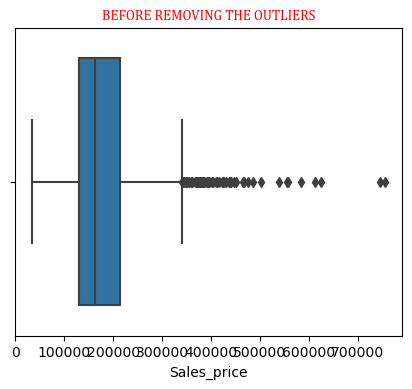

In [12]:
plt.figure(figsize=(5,4))
sns.boxplot(df_housing['SalePrice'])
plt.title('BEFORE REMOVING THE OUTLIERS',fontdict={'family':'cambria','color':'red',"size":10})
plt.xlabel('Sales_price')
plt.show()

In [13]:
df_housing=df_housing[(df_housing['SalePrice']>min_) & (df_housing['SalePrice']<max_)]

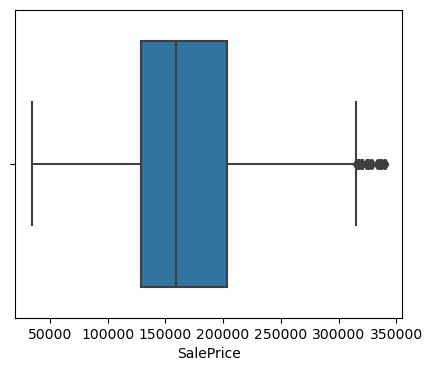

In [14]:

plt.figure(figsize=(5,4))
sns.boxplot(df_housing['SalePrice'])
plt.show()

In [15]:
df_housing

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [16]:
# round(df_housing.isnull().sum()/len(df_housing)*100,2)

In [17]:
df_housing.columns[df_housing.isnull().any()]
null = df_housing.isnull().sum()/len(df_housing)*100
null = null[null>0]
null.sort_values(inplace=True, ascending=False)
null

PoolQC          99.571122
MiscFeature     96.140100
Alley           93.495354
Fence           80.200143
FireplaceQu     49.249464
LotFrontage     18.298785
GarageType       5.789850
GarageYrBlt      5.789850
GarageFinish     5.789850
GarageQual       5.789850
GarageCond       5.789850
BsmtExposure     2.716226
BsmtFinType2     2.716226
BsmtFinType1     2.644746
BsmtCond         2.644746
BsmtQual         2.644746
MasVnrArea       0.500357
MasVnrType       0.500357
Electrical       0.071480
dtype: float64

## ACCORDING TO THE DATA DICTIONARY THESE COLUMNS HAVE NULL VALUES IT MEANS THAT IT DOES NOT CONTAIN THE FACILITY SO BETTER TO DROP OR REPALCE WITH NONE VALUES

In [18]:
# dropping the columns which has more than 80% null valaues it is best to drop 
df_housing=df_housing.drop(['PoolQC','MiscFeature','Alley','Fence'],axis=1)

In [19]:
df_housing.columns[df_housing.isnull().any()]

Index(['LotFrontage', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical',
       'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageQual', 'GarageCond'],
      dtype='object')

In [20]:
df_housing[['LotFrontage', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical',
       'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageQual', 'GarageCond']]

,LotFrontage,MasVnrType,MasVnrArea,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Electrical,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageQual,GarageCond
0,65.0,BrkFace,196.0,Gd,TA,No,GLQ,Unf,SBrkr,NaN,Attchd,2003.0,RFn,TA,TA
1,80.0,None,0.0,Gd,TA,Gd,ALQ,Unf,SBrkr,TA,Attchd,1976.0,RFn,TA,TA
2,68.0,BrkFace,162.0,Gd,TA,Mn,GLQ,Unf,SBrkr,TA,Attchd,2001.0,RFn,TA,TA
3,60.0,None,0.0,TA,Gd,No,ALQ,Unf,SBrkr,Gd,Detchd,1998.0,Unf,TA,TA
4,84.0,BrkFace,350.0,Gd,TA,Av,GLQ,Unf,SBrkr,TA,Attchd,2000.0,RFn,TA,TA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,62.0,None,0.0,Gd,TA,No,Unf,Unf,SBrkr,TA,Attchd,1999.0,RFn,TA,TA
1456,85.0,Stone,119.0,Gd,TA,No,ALQ,Rec,SBrkr,TA,Attchd,1978.0,Unf,TA,TA
1457,66.0,None,0.0,TA,Gd,No,GLQ,Unf,SBrkr,Gd,Attchd,1941.0,RFn,TA,TA
1458,68.0,None,0.0,TA,TA,Mn,GLQ,Rec,FuseA,NaN,Attchd,1950.0,Unf,TA,TA


### WE HAVE FILL THE NULL VALUES .... FOR CATEGORICAL WE HAVE FILL WITH NONE WHERE AS FOR NUMERICAL REPLACE WITH MODE AND WHICH HAS 80% OF NULL VALUES WE HAVE DROPPED THEM IF WE REPLACE WITH 0 IT IS WASTE

In [21]:
df_housing['LotFrontage']=df_housing['LotFrontage'].fillna(df_housing['LotFrontage'].mode()[0])
df_housing['MasVnrArea']=df_housing['MasVnrArea'].fillna(df_housing['MasVnrArea'].mode()[0])
df_housing['GarageYrBlt']=df_housing['GarageYrBlt'].fillna(df_housing['GarageYrBlt'].mode()[0])

In [22]:
fill_na_cat=['MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'Electrical', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageQual', 'GarageCond']
for i in fill_na_cat:
    df_housing[i].fillna("none",inplace=True)

In [23]:
(df_housing.isnull().sum()/len(df_housing)*100).head(4)

Id             0.0
MSSubClass     0.0
MSZoning       0.0
LotFrontage    0.0
dtype: float64

In [24]:
# checking the columns one by one
df_housing

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,...,112,0,0,0,0,4,2010,WD,Normal,142125


In [25]:
# C Commercial
# FV Floating Village Residential
# RH Residential High Density
# RL Residential Low Density
# RM Residential Medium Densi
df_housing['MSZoning'].value_counts()

RL         1093
RM          216
FV           64
RH           16
C (all)      10
Name: MSZoning, dtype: int64

In [26]:
df_housing['Street'].value_counts()

Pave    1393
Grvl       6
Name: Street, dtype: int64

In [27]:
df_housing[['LotShape','LandContour']].value_counts()

LotShape  LandContour
Reg       Lvl            836
IR1       Lvl            395
Reg       Bnk             39
IR1       HLS             27
IR2       Lvl             25
IR1       Bnk             19
          Low             16
Reg       Low             12
          HLS             11
IR2       Low              5
IR3       Lvl              5
IR2       Bnk              3
          HLS              2
IR3       Bnk              2
          HLS              1
          Low              1
dtype: int64

In [28]:
df_housing['SaleCondition'].value_counts()

Normal     1170
Abnorml     100
Partial      94
Family       20
Alloca       11
AdjLand       4
Name: SaleCondition, dtype: int64

In [29]:
df_housing['SaleType'].value_counts()

WD       1238
New        91
COD        43
ConLD       9
ConLw       5
ConLI       4
CWD         4
Oth         3
Con         2
Name: SaleType, dtype: int64

In [30]:
# for all numericall data performing the operation
df_housing.select_dtypes(include=['float64','int64']).describe()


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1399.000000,1399.000000,1399.000000,1399.000000,1399.000000,1399.000000,1399.000000,1399.000000,1399.000000,1399.000000,...,1399.000000,1399.000000,1399.000000,1399.000000,1399.000000,1399.000000,1399.000000,1399.000000,1399.000000,1399.000000
mean,733.508935,57.487491,67.401001,10155.280915,5.983560,5.591137,1970.080772,1984.058613,89.725518,417.333095,...,89.621158,44.892066,22.378127,3.231594,14.634024,2.482487,45.385275,6.312366,2007.819871,170237.127234
std,422.811873,42.803603,21.806144,8324.834198,1.282272,1.118236,30.009463,20.661160,159.219858,428.401771,...,121.798431,65.718951,61.454480,28.563071,54.752105,38.289681,506.746349,2.703584,1.327762,59230.130817
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,367.500000,20.000000,60.000000,7442.000000,5.000000,5.000000,1953.000000,1966.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129000.000000
50%,739.000000,50.000000,61.000000,9317.000000,6.000000,5.000000,1971.000000,1992.000000,0.000000,370.000000,...,0.000000,22.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,159500.000000
75%,1098.500000,70.000000,78.000000,11316.500000,7.000000,6.000000,1999.000000,2003.000000,143.000000,686.000000,...,165.000000,64.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,203500.000000
max,1460.000000,190.000000,313.000000,164660.000000,10.000000,9.000000,2009.000000,2010.000000,1600.000000,5644.000000,...,736.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,340000.000000


### EDA

In [31]:
pd.set_option('display.max_columns',500)

In [32]:
#### All numeric (float and int) variables in the dataset
df_housing=df_housing.drop('Id',axis=1)
df_housing_numeric=df_housing.select_dtypes(include=['float64','int64'])
df_housing_numeric.head(4)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000


###  PLOTTING SOME GRAPH COMPARING WITH TRAGET VARIABLE

- **AS WE SEE THE GRAPH THE ALLOC WAS HIGH AS THE EVERY YEAR IT GOES DECRESING AND PARTIAL WAS INCREASED YEAR BY YEAR**
- **Adjoining Land Purchase HAS BEEN TFULLY DECREASED BY 2009 AND 2010**

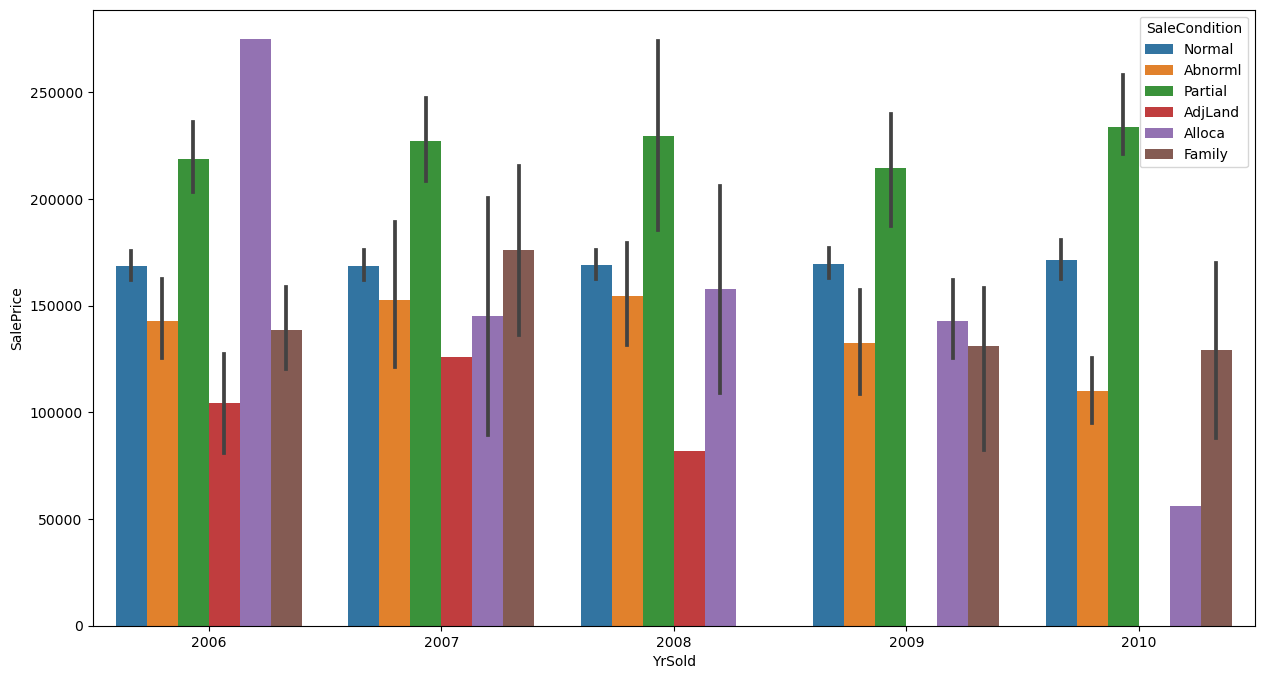

In [33]:
plt.figure(figsize=(15,8))
sns.barplot(data=df_housing,x='YrSold',y='SalePrice',hue='SaleCondition')
plt.show()

- **THOUSE WHO LIVES IN PAVE STREET HAS 2STORY HOUSE**
- **FROM THE GRAPH WE OBSERVED THAT RATES THE OVERALL MATERIAL AND FINISH OF THE HOUSE IS GOOD IS POSITIVLIY INCRESING DAY BY DAY**
- **WHERE AS OVERALL CONDITIONS IS INCREASING DAY BY DAY**

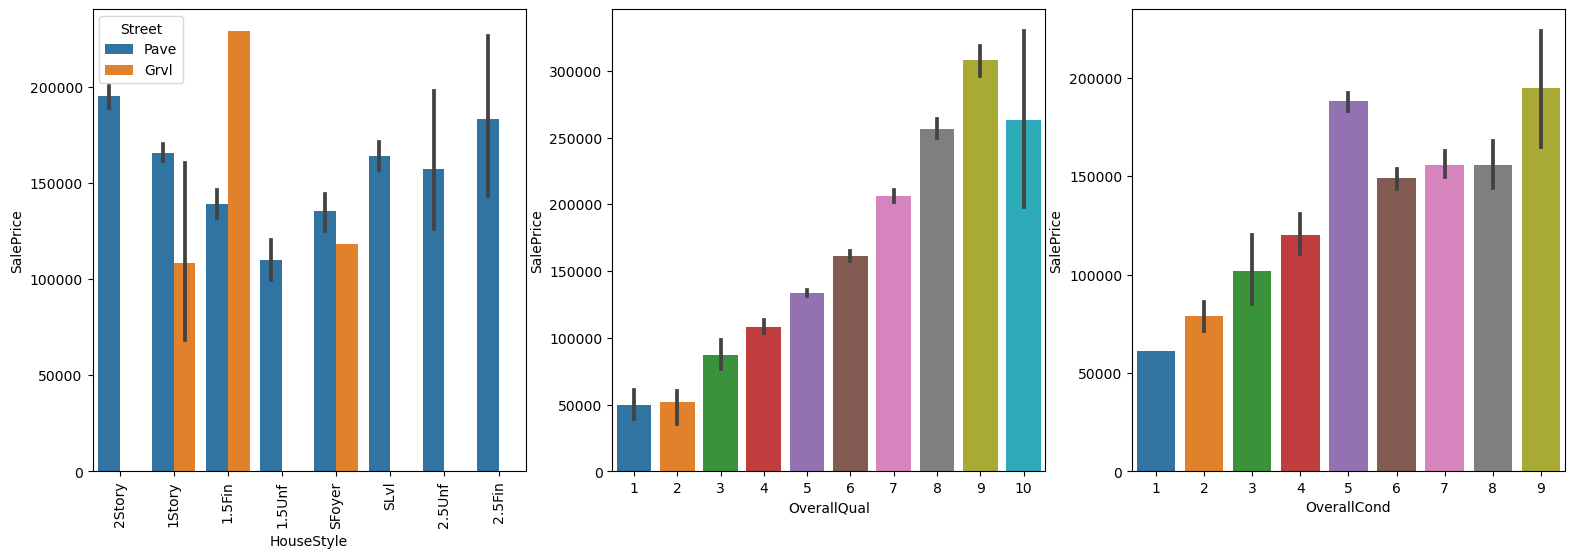

In [34]:
# 1Story	One story
#        1.5Fin	One and one-half story: 2nd level finished
#        1.5Unf	One and one-half story: 2nd level unfinished
#        2Story	Two story
#        2.5Fin	Two and one-half story: 2nd level finished
#        2.5Unf	Two and one-half story: 2nd level unfinished
#        SFoyer	Split Foyer
#        SLvl	Split Level

plt.figure(figsize=(19,6))
plt.subplot(1,3,1)
sns.barplot(data=df_housing,x='HouseStyle',y='SalePrice',hue='Street')
plt.xticks(rotation=90)
plt.subplot(1,3,2)
sns.barplot(data=df_housing,x='OverallQual',y='SalePrice')
plt.subplot(1,3,3)
sns.barplot(data=df_housing,x='OverallCond',y='SalePrice')
plt.show()

### FROM THE DISTRIBUTION AND HISTOGRAM PLOT  WE HAVE OBSERVERD THAT IT IS NORMALLY DISTRIBUTED SOME WHAT NOT BAD
- **FROM THE RATING OF BASMENT OF FINISHED AREA ``ALQ - AVERAGE LIVING QUARTERS`` IS HIGH THOSE WHO HAVE HIGH SALARAY THEY ARE LIVING IN `ALQ`**

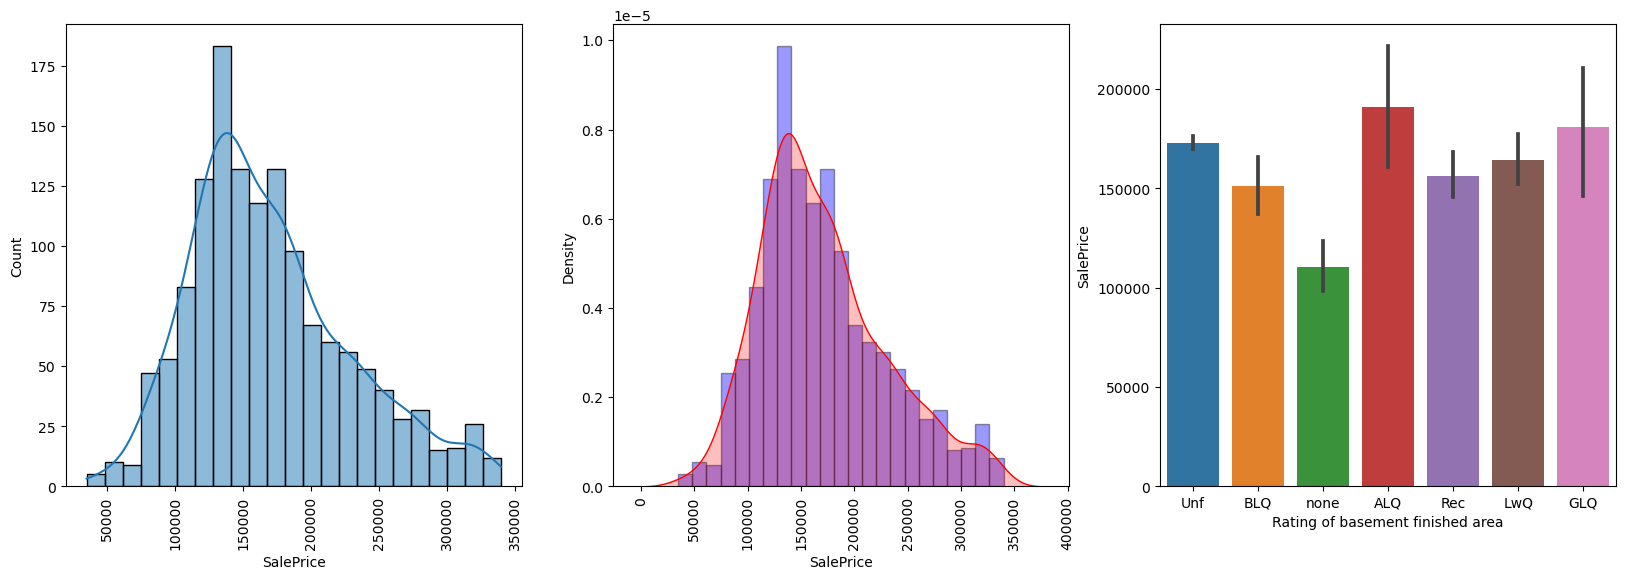

In [35]:
plt.figure(figsize=(20,6))
plt.subplot(1,3,1)
sns.histplot(df_housing['SalePrice'],kde=True)
plt.xticks(rotation=90)
# -------------------------------------------------------
plt.subplot(1,3,2)
sns.distplot(df_housing['SalePrice'],hist_kws={'edgecolor':'black','color':'blue'},kde_kws={'fill':True,'color':'red'},)
plt.xticks(rotation=90)
# --------------------------------------------------------
# GLQ	Good Living Quarters
#        ALQ	Average Living Quarters
#        BLQ	Below Average Living Quarters	
#        Rec	Average Rec Room
#        LwQ	Low Quality
#        Unf	Unfinshed
#        NA	No Basement
plt.subplot(1,3,3)
sns.barplot(data=df_housing,x='BsmtFinType2',y='SalePrice')
plt.xlabel('Rating of basement finished area')


plt.show()

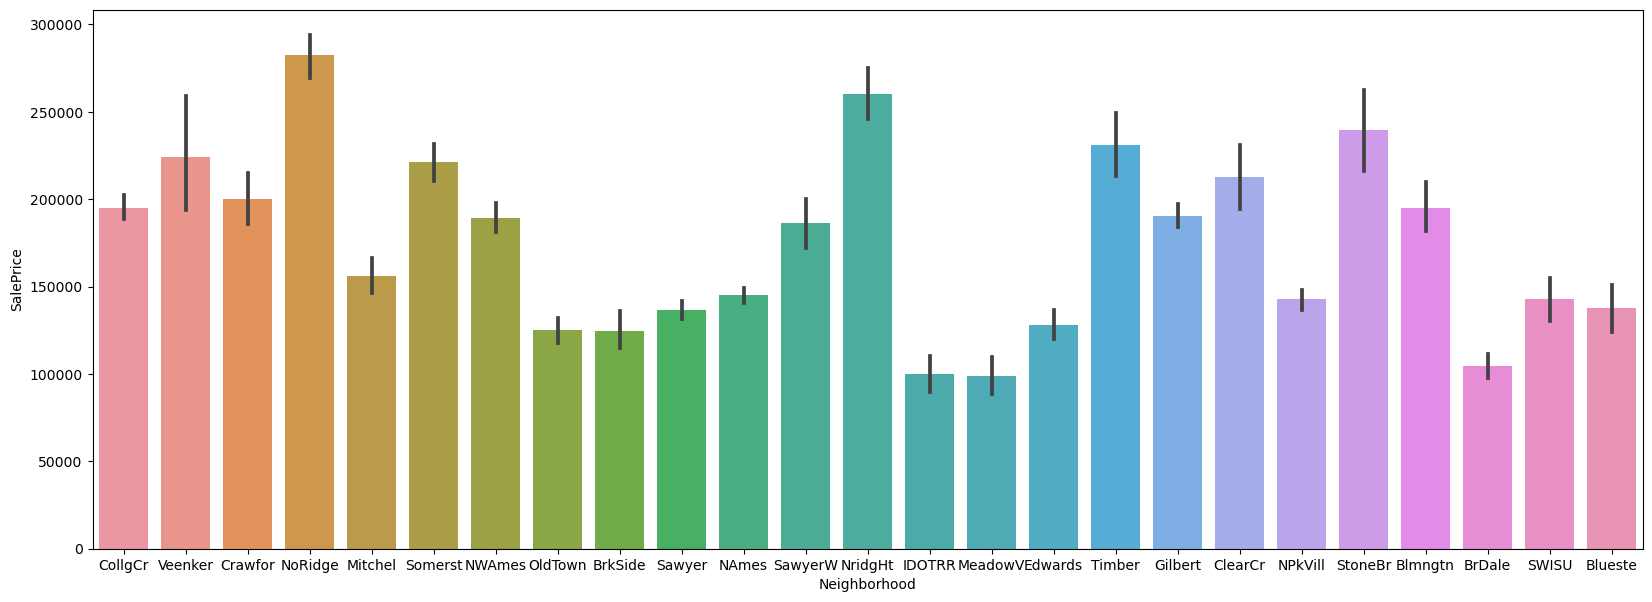

In [36]:
plt.figure(figsize=(20,7))
sns.barplot(data=df_housing,x='Neighborhood',y='SalePrice')
plt.show()

- **DRAWING A JOIN PLOT  BETWEEN TRAGET VARIABLE & SOME VARIABLES LIKE ```GrLivArea,LotFrontage,LotArea,OverallQual,1stFlrSF,Electrical,Property_age_years```**

### WE ARE CREATING  A NEW COLUMN WHICH IS ``` PROPERTY AGE``` FROM  THE  ``YEAR OF BUILT & YEAR OF SOLD THE PREOPERTY``

In [37]:
df_housing['Property_age_years']=df_housing['YrSold']-df_housing['YearBuilt']

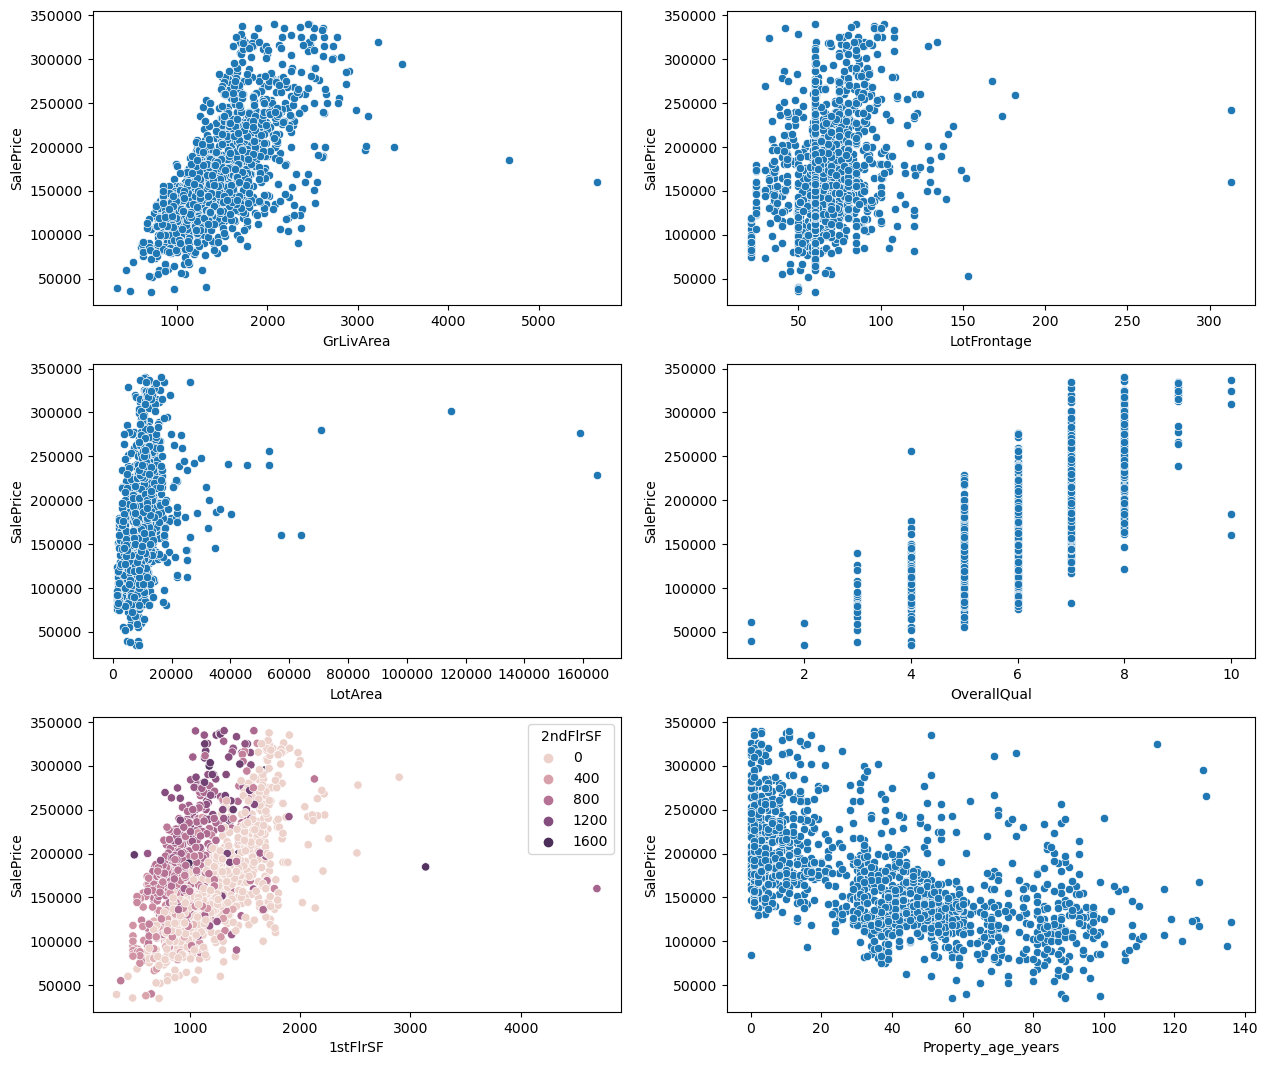

In [38]:

# Again plotting GeLivArea vs SalePrice

plt.figure(figsize=(15,13))
plt.subplot(3,2,1)

sns.scatterplot(data=df_housing,x=df_housing['GrLivArea'],y=df_housing['SalePrice'])

# ----------------------------------------------------------------------------------------------
plt.subplot(3,2,2)
sns.scatterplot(data=df_housing,x=df_housing['LotFrontage'],y=df_housing['SalePrice'])
# ----------------------------------------------------------------------------------------------
plt.subplot(3,2,3)
sns.scatterplot(data=df_housing,x=df_housing['LotArea'],y=df_housing['SalePrice'])
# ----------------------------------------------------------------------------------------------

plt.subplot(3,2,4)
sns.scatterplot(data=df_housing,x=df_housing['OverallQual'],y=df_housing['SalePrice'])
# ----------------------------------------------------------------------------------------------
plt.subplot(3,2,5)
sns.scatterplot(data=df_housing,x=df_housing['1stFlrSF'],y=df_housing['SalePrice'],hue=df_housing['2ndFlrSF'])

# ----------------------------------------------------------------------------------------------
plt.subplot(3,2,6)
sns.scatterplot(data=df_housing,x=df_housing['Property_age_years'],y=df_housing['SalePrice'])
# ----------------------------------------------------------------------------------------------

plt.show()

### CHECKING THE HOW THEY ARE RELATED

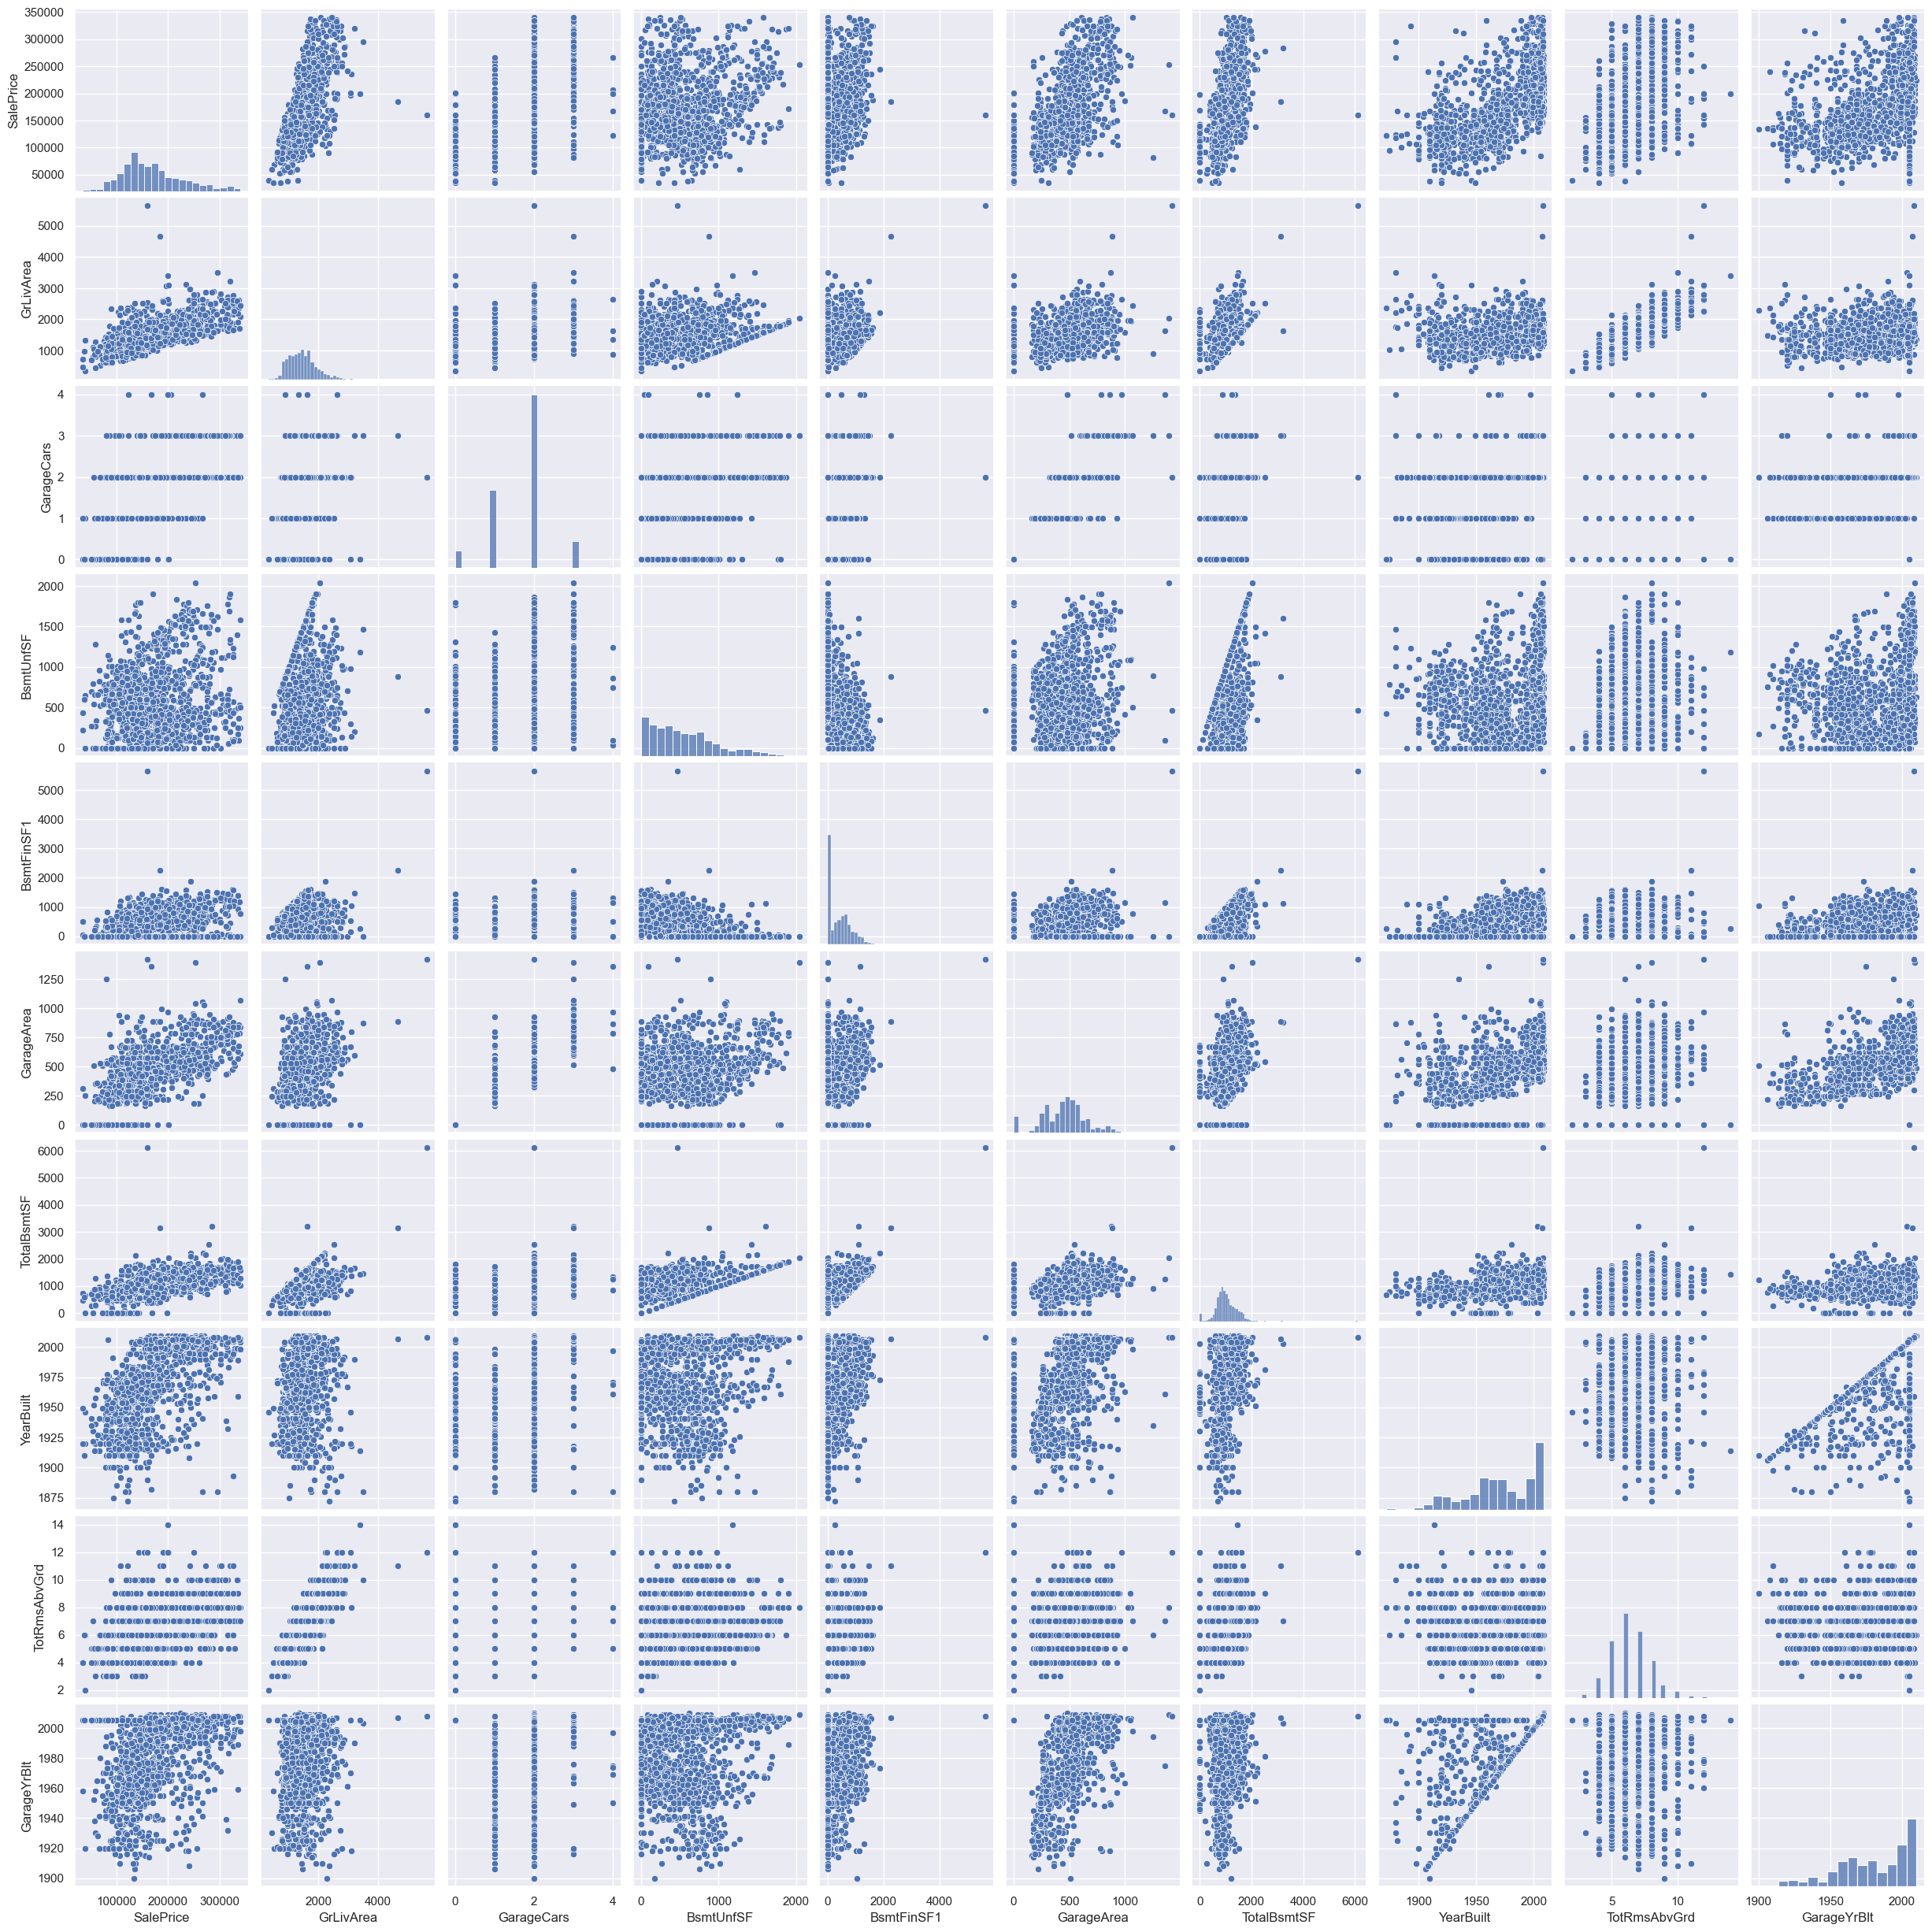

In [39]:
# Checking the same with a pairplot 
sns.set()
cols = ['SalePrice', 'GrLivArea', 'GarageCars', 'BsmtUnfSF', 'BsmtFinSF1', 'GarageArea', 'TotalBsmtSF', 'YearBuilt', 'TotRmsAbvGrd', 'GarageYrBlt']
sns.pairplot(df_housing[cols], size = 2.5)
plt.show()

### DROPPING THOUSE COLUMN WHICH THEY ARE NOT CORRLETED WITH SALE PRICE 

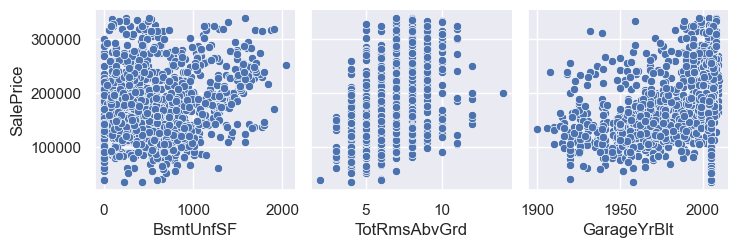

In [40]:
sns.pairplot(data=df_housing,x_vars=['BsmtUnfSF','TotRmsAbvGrd','GarageYrBlt'],y_vars='SalePrice')
plt.show()

In [41]:
df_housing[['BsmtUnfSF','TotRmsAbvGrd','GarageYrBlt','SalePrice']].corr()

,BsmtUnfSF,TotRmsAbvGrd,GarageYrBlt,SalePrice
BsmtUnfSF,1.000000,0.240316,0.164214,0.222795
TotRmsAbvGrd,0.240316,1.000000,0.069166,0.472292
GarageYrBlt,0.164214,0.069166,1.000000,0.393420
SalePrice,0.222795,0.472292,0.393420,1.000000


In [42]:
df_housing = df_housing.drop(['BsmtUnfSF'], axis = 1)
df_housing = df_housing.drop(['TotRmsAbvGrd'], axis = 1)
df_housing = df_housing.drop(['GarageYrBlt'], axis = 1)    

df_housing.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Property_age_years
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,Typ,0,none,Attchd,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500,5
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,Typ,1,TA,Attchd,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500,31
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,Typ,1,TA,Attchd,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500,7
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,Typ,1,Gd,Detchd,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000,91
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,Typ,1,TA,Attchd,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000,8


#### DROPPING THE SOME COLUMNS WHICH ARE NOT REQUIRED IN FURTHER AND LEAST CORRELATED AND ALSO NOT INCLUDE US

In [43]:
df_housing=df_housing.drop(['YearBuilt','MoSold','YrSold','YearRemodAdd'],axis=1)

In [44]:
df_housing.Street.value_counts()

Pave    1393
Grvl       6
Name: Street, dtype: int64

In [45]:
df_housing.Utilities.value_counts()

AllPub    1398
NoSeWa       1
Name: Utilities, dtype: int64

In [46]:
c=df_housing[['Utilities','Street','Condition2','RoofMatl','Exterior1st', 'Exterior2nd','MasVnrArea','BsmtExposure','BsmtFinType1','Heating',
                'LowQualFinSF','BsmtHalfBath','KitchenAbvGr','SaleType','3SsnPorch','ScreenPorch','PoolArea','MiscVal','SalePrice']]

In [47]:
d=c.corr()

In [48]:
d

,MasVnrArea,LowQualFinSF,BsmtHalfBath,KitchenAbvGr,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice
MasVnrArea,1.000000,-0.067856,0.031197,-0.026438,0.015367,0.069776,0.026999,-0.026690,0.350541
LowQualFinSF,-0.067856,1.000000,-0.004683,0.008612,-0.002948,-0.032183,0.071475,-0.003693,-0.058086
BsmtHalfBath,0.031197,-0.004683,1.000000,-0.039409,0.023590,0.037352,0.023909,-0.007858,-0.018827
KitchenAbvGr,-0.026438,0.008612,-0.039409,1.000000,-0.024472,-0.052061,-0.014024,0.061603,-0.147385
3SsnPorch,0.015367,-0.002948,0.023590,-0.024472,1.000000,-0.030261,-0.007341,0.000930,0.043324
ScreenPorch,0.069776,-0.032183,0.037352,-0.052061,-0.030261,1.000000,0.060575,0.033939,0.108851
PoolArea,0.026999,0.071475,0.023909,-0.014024,-0.007341,0.060575,1.000000,0.032456,0.048682
MiscVal,-0.026690,-0.003693,-0.007858,0.061603,0.000930,0.033939,0.032456,1.000000,-0.012872
SalePrice,0.350541,-0.058086,-0.018827,-0.147385,0.043324,0.108851,0.048682,-0.012872,1.000000


<AxesSubplot:>

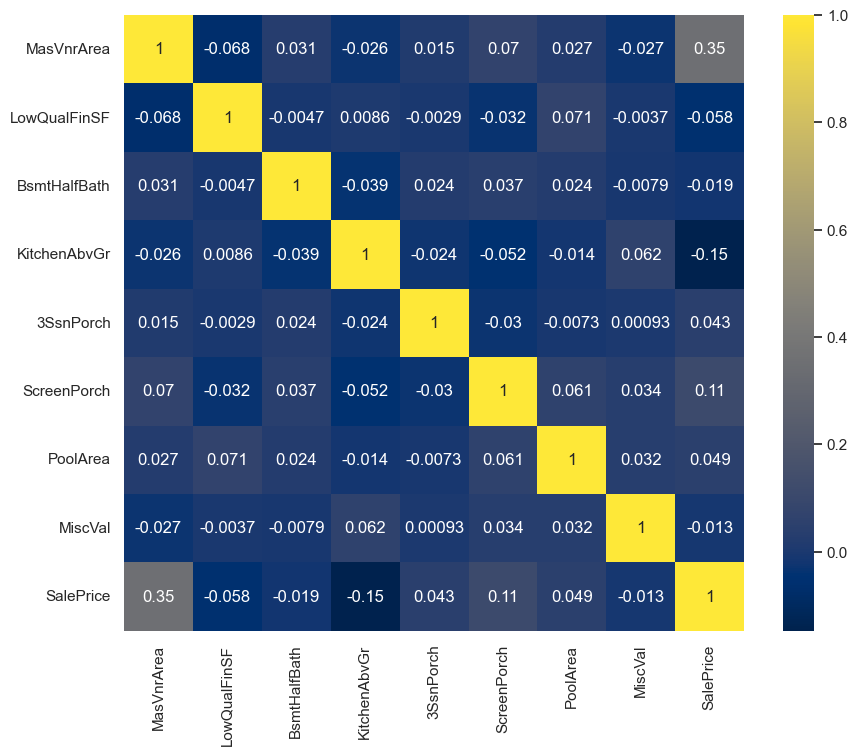

In [49]:
plt.figure(figsize=(10,8))
sns.heatmap(d,cmap='cividis',annot=True)

In [50]:
c.select_dtypes('object').columns

Index(['Utilities', 'Street', 'Condition2', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'BsmtExposure', 'BsmtFinType1', 'Heating', 'SaleType'],
      dtype='object')

In [51]:
c['Utilities'].value_counts()

AllPub    1398
NoSeWa       1
Name: Utilities, dtype: int64

In [52]:
c['Street'].value_counts()

Pave    1393
Grvl       6
Name: Street, dtype: int64

In [53]:
c['Condition2'].value_counts()

Norm      1385
Feedr        6
Artery       2
RRNn         2
PosN         1
PosA         1
RRAn         1
RRAe         1
Name: Condition2, dtype: int64

In [54]:
c['RoofMatl'].value_counts()

CompShg    1376
Tar&Grv      11
WdShake       5
WdShngl       3
Metal         1
Membran       1
Roll          1
ClyTile       1
Name: RoofMatl, dtype: int64

In [55]:
c['Exterior1st'].value_counts()

VinylSd    479
HdBoard    220
MetalSd    217
Wd Sdng    203
Plywood    107
CemntBd     52
BrkFace     47
WdShing     24
Stucco      23
AsbShng     20
BrkComm      2
Stone        2
AsphShn      1
ImStucc      1
CBlock       1
Name: Exterior1st, dtype: int64

In [56]:
c['Exterior2nd'].value_counts()

VinylSd    468
MetalSd    211
HdBoard    205
Wd Sdng    194
Plywood    142
CmentBd     51
Wd Shng     35
Stucco      25
BrkFace     23
AsbShng     20
ImStucc      8
Brk Cmn      7
Stone        5
AsphShn      3
Other        1
CBlock       1
Name: Exterior2nd, dtype: int64

In [57]:
c['BsmtExposure'].value_counts()

No      941
Av      205
Mn      108
Gd      107
none     38
Name: BsmtExposure, dtype: int64

In [58]:
c['BsmtFinType1'].value_counts()

Unf     419
GLQ     372
ALQ     218
BLQ     147
Rec     132
LwQ      74
none     37
Name: BsmtFinType1, dtype: int64

In [59]:
c['MiscVal'].value_counts()

0        1347
400        11
500         8
700         5
450         4
600         4
2000        4
1200        2
480         2
15500       1
800         1
350         1
3500        1
1300        1
54          1
620         1
560         1
1400        1
8300        1
1150        1
2500        1
Name: MiscVal, dtype: int64

In [60]:
c['PoolArea'].value_counts()

0      1393
512       1
648       1
576       1
480       1
519       1
738       1
Name: PoolArea, dtype: int64

In [61]:
df_housing

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SaleType,SaleCondition,SalePrice,Property_age_years
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,Typ,0,none,Attchd,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,WD,Normal,208500,5
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,Typ,1,TA,Attchd,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,WD,Normal,181500,31
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,Typ,1,TA,Attchd,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,WD,Normal,223500,7
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,Typ,1,Gd,Detchd,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,WD,Abnorml,140000,91
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,Typ,1,TA,Attchd,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,WD,Normal,250000,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,Typ,1,TA,Attchd,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,0,WD,Normal,175000,8
1456,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,Min1,2,TA,Attchd,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,0,WD,Normal,210000,32
1457,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,Typ,2,Gd,Attchd,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,2500,WD,Normal,266500,69
1458,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,1078,GasA,Gd,Y,FuseA,1078,0,0,1078,1,0,1,0,2,1,Gd,Typ,0,none,Attchd,Unf,1,240,TA,TA,Y,366,0,112,0,0,0,0,WD,Normal,142125,60


In [62]:
df_housing=df_housing.drop(['Utilities','Street','Condition2','RoofMatl','Heating','GarageCars'
                ,'SaleType','3SsnPorch','OverallCond','Functional','GarageCond','MSSubClass','LowQualFinSF',],axis=1)

In [63]:
df_housing.columns

Index(['MSZoning', 'LotFrontage', 'LotArea', 'LotShape', 'LandContour',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'BldgType',
       'HouseStyle', 'OverallQual', 'RoofStyle', 'Exterior1st', 'Exterior2nd',
       'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'TotalBsmtSF', 'HeatingQC', 'CentralAir',
       'Electrical', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageArea', 'GarageQual', 'PavedDrive', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'SaleCondition', 'SalePrice', 'Property_age_years'],
      dtype='object')

In [64]:
# this was some eda next we will go to thee data preparation

### DATA PREPARATION
- **LETS EXPLORE**

In [65]:
df_housing_categorical=df_housing.select_dtypes(['object'])
df_housing_numeric=df_housing.select_dtypes(['float64','int64'])

### DISPLAYING THE CATEGORICAL AND NUMRICAL COLUMNS SEPERATE

In [66]:
df_housing_categorical.head(4)

,MSZoning,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,BldgType,HouseStyle,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,CentralAir,Electrical,KitchenQual,FireplaceQu,GarageType,GarageFinish,GarageQual,PavedDrive,SaleCondition
0,RL,Reg,Lvl,Inside,Gtl,CollgCr,Norm,1Fam,2Story,Gable,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,Ex,Y,SBrkr,Gd,none,Attchd,RFn,TA,Y,Normal
1,RL,Reg,Lvl,FR2,Gtl,Veenker,Feedr,1Fam,1Story,Gable,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,Ex,Y,SBrkr,TA,TA,Attchd,RFn,TA,Y,Normal
2,RL,IR1,Lvl,Inside,Gtl,CollgCr,Norm,1Fam,2Story,Gable,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,Ex,Y,SBrkr,Gd,TA,Attchd,RFn,TA,Y,Normal
3,RL,IR1,Lvl,Corner,Gtl,Crawfor,Norm,1Fam,2Story,Gable,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,Gd,Y,SBrkr,Gd,Gd,Detchd,Unf,TA,Y,Abnorml


In [67]:
df_housing_categorical.shape

(1399, 31)

In [68]:
df_housing_numeric.head(4)

,LotFrontage,LotArea,OverallQual,MasVnrArea,BsmtFinSF1,BsmtFinSF2,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,Fireplaces,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,PoolArea,MiscVal,SalePrice,Property_age_years
0,65.0,8450,7,196.0,706,0,856,856,854,1710,1,0,2,1,3,1,0,548,0,61,0,0,0,0,208500,5
1,80.0,9600,6,0.0,978,0,1262,1262,0,1262,0,1,2,0,3,1,1,460,298,0,0,0,0,0,181500,31
2,68.0,11250,7,162.0,486,0,920,920,866,1786,1,0,2,1,3,1,1,608,0,42,0,0,0,0,223500,7
3,60.0,9550,7,0.0,216,0,756,961,756,1717,1,0,1,0,3,1,1,642,0,35,272,0,0,0,140000,91


In [69]:
df_housing_numeric.shape

(1399, 26)

In [70]:
df_housing_categorical.columns

Index(['MSZoning', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'BldgType', 'HouseStyle', 'RoofStyle',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'PavedDrive',
       'SaleCondition'],
      dtype='object')

In [71]:
df_housing_numeric.columns

Index(['LotFrontage', 'LotArea', 'OverallQual', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'Fireplaces', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'SalePrice',
       'Property_age_years'],
      dtype='object')

In [72]:
# transforming the saleprice coulumn in too loG

In [73]:
df_housing['SalePrice']=np.log1p(df_housing['SalePrice'])


In [74]:
df_housing

,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,TotalBsmtSF,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageArea,GarageQual,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,PoolArea,MiscVal,SaleCondition,SalePrice,Property_age_years
0,RL,65.0,8450,Reg,Lvl,Inside,Gtl,CollgCr,Norm,1Fam,2Story,7,Gable,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,856,Ex,Y,SBrkr,856,854,1710,1,0,2,1,3,1,Gd,0,none,Attchd,RFn,548,TA,Y,0,61,0,0,0,0,Normal,12.247699,5
1,RL,80.0,9600,Reg,Lvl,FR2,Gtl,Veenker,Feedr,1Fam,1Story,6,Gable,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,1262,Ex,Y,SBrkr,1262,0,1262,0,1,2,0,3,1,TA,1,TA,Attchd,RFn,460,TA,Y,298,0,0,0,0,0,Normal,12.109016,31
2,RL,68.0,11250,IR1,Lvl,Inside,Gtl,CollgCr,Norm,1Fam,2Story,7,Gable,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,920,Ex,Y,SBrkr,920,866,1786,1,0,2,1,3,1,Gd,1,TA,Attchd,RFn,608,TA,Y,0,42,0,0,0,0,Normal,12.317171,7
3,RL,60.0,9550,IR1,Lvl,Corner,Gtl,Crawfor,Norm,1Fam,2Story,7,Gable,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,756,Gd,Y,SBrkr,961,756,1717,1,0,1,0,3,1,Gd,1,Gd,Detchd,Unf,642,TA,Y,0,35,272,0,0,0,Abnorml,11.849405,91
4,RL,84.0,14260,IR1,Lvl,FR2,Gtl,NoRidge,Norm,1Fam,2Story,8,Gable,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,1145,Ex,Y,SBrkr,1145,1053,2198,1,0,2,1,4,1,Gd,1,TA,Attchd,RFn,836,TA,Y,192,84,0,0,0,0,Normal,12.429220,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,62.0,7917,Reg,Lvl,Inside,Gtl,Gilbert,Norm,1Fam,2Story,6,Gable,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,Ex,Y,SBrkr,953,694,1647,0,0,2,1,3,1,TA,1,TA,Attchd,RFn,460,TA,Y,0,40,0,0,0,0,Normal,12.072547,8
1456,RL,85.0,13175,Reg,Lvl,Inside,Gtl,NWAmes,Norm,1Fam,1Story,6,Gable,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,1542,TA,Y,SBrkr,2073,0,2073,1,0,2,0,3,1,TA,2,TA,Attchd,Unf,500,TA,Y,349,0,0,0,0,0,Normal,12.254868,32
1457,RL,66.0,9042,Reg,Lvl,Inside,Gtl,Crawfor,Norm,1Fam,2Story,7,Gable,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,1152,Ex,Y,SBrkr,1188,1152,2340,0,0,2,0,4,1,Gd,2,Gd,Attchd,RFn,252,TA,Y,0,60,0,0,0,2500,Normal,12.493133,69
1458,RL,68.0,9717,Reg,Lvl,Inside,Gtl,NAmes,Norm,1Fam,1Story,5,Hip,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,1078,Gd,Y,FuseA,1078,0,1078,1,0,1,0,2,1,Gd,0,none,Attchd,Unf,240,TA,Y,366,0,112,0,0,0,Normal,11.864469,60


### CREATING A DUMMY VARIABLE FOR CATEGORICAL VARIABLES `` ONE HOT ENCODING``

In [75]:
df_housing=pd.get_dummies(df_housing,drop_first=True)
df_housing

,LotFrontage,LotArea,OverallQual,MasVnrArea,BsmtFinSF1,BsmtFinSF2,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,Fireplaces,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,PoolArea,MiscVal,SalePrice,Property_age_years,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,MasVnrType_none,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtQual_none,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtCond_none,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_none,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType1_none,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,BsmtFinType2_none,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Electrical_none,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Po,FireplaceQu_TA,FireplaceQu_none,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_none,GarageFinish_RFn,GarageFinish_Unf,GarageFinish_none,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageQual_none,PavedDrive_P,PavedDrive_Y,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,65.0,8450,7,196.0,706,0,856,856,854,1710,1,0,2,1,3,1,0,548,0,61,0,0,0,0,12.247699,5,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0
1,80.0,9600,6,0.0,978,0,1262,1262,0,1262,0,1,2,0,3,1,1,460,298,0,0,0,0,0,12.109016,31,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0

#  DIVIDING X  & Y TERMS

In [76]:
y=df_housing.pop('SalePrice')
y

0       12.247699
1       12.109016
2       12.317171
3       11.849405
4       12.429220
          ...    
1455    12.072547
1456    12.254868
1457    12.493133
1458    11.864469
1459    11.901590
Name: SalePrice, Length: 1399, dtype: float64

In [77]:
X=df_housing

In [78]:
X

,LotFrontage,LotArea,OverallQual,MasVnrArea,BsmtFinSF1,BsmtFinSF2,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,Fireplaces,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,PoolArea,MiscVal,Property_age_years,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,MasVnrType_none,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtQual_none,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtCond_none,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_none,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType1_none,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,BsmtFinType2_none,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Electrical_none,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Po,FireplaceQu_TA,FireplaceQu_none,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_none,GarageFinish_RFn,GarageFinish_Unf,GarageFinish_none,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageQual_none,PavedDrive_P,PavedDrive_Y,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,65.0,8450,7,196.0,706,0,856,856,854,1710,1,0,2,1,3,1,0,548,0,61,0,0,0,0,5,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0
1,80.0,9600,6,0.0,978,0,1262,1262,0,1262,0,1,2,0,3,1,1,460,298,0,0,0,0,0,31,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1

In [79]:
# importing liberary 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler,MinMaxScaler,scale


In [80]:
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.70,test_size=0.30,random_state=100)

In [81]:
print(f"THE SHAPE OF THE X TRAIN IS : {X_train.shape} ")
print(f"THE SHAPE OF THE X test IS : {X_test.shape} ")
print(f"THE SHAPE OF THE y TRAIN IS : {y_train.shape} ")
print(f"THE SHAPE OF THE y TRAIN IS : {y_test.shape} ")

THE SHAPE OF THE X TRAIN IS : (979, 197) 
THE SHAPE OF THE X test IS : (420, 197) 
THE SHAPE OF THE y TRAIN IS : (979,) 
THE SHAPE OF THE y TRAIN IS : (420,) 


In [82]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 979 entries, 162 to 836
Columns: 197 entries, LotFrontage to SaleCondition_Partial
dtypes: float64(2), int64(23), uint8(172)
memory usage: 363.3 KB


In [83]:
X_train

,LotFrontage,LotArea,OverallQual,MasVnrArea,BsmtFinSF1,BsmtFinSF2,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,Fireplaces,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,PoolArea,MiscVal,Property_age_years,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,MasVnrType_none,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtQual_none,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtCond_none,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_none,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType1_none,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,BsmtFinType2_none,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Electrical_none,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Po,FireplaceQu_TA,FireplaceQu_none,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_none,GarageFinish_RFn,GarageFinish_Unf,GarageFinish_none,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageQual_none,PavedDrive_P,PavedDrive_Y,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
162,95.0,12182,7,226.0,1201,0,1541,1541,0,1541,0,0,2,0,3,1,1,532,0,70,0,0,0,0,5,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1
743,70.0,12886,5,0.0,444,0,520,1464,0,1464,0,1,2,0,3,1,1,480,302,0,0,100,0,0,46,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1

### SCALING THE FEATRUES IT IS IMPORTANT . 
- **WE ARE FIRST CREATING THE NUMERICAL COLUMNS THEN SCALING IT AND THEN WE ARE CONCATING TO THE TRAIN DATA WHAT EVER IT MAY BE**

In [84]:
X_train.select_dtypes(['int64','float64']).columns

Index(['LotFrontage', 'LotArea', 'OverallQual', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'Fireplaces', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'Property_age_years'],
      dtype='object')

In [85]:
# standardising the value
scaler=MinMaxScaler()
X_train[['LotFrontage', 'LotArea', 'OverallQual', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'Fireplaces', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'Property_age_years']]=scaler.fit_transform(X_train[['LotFrontage', 'LotArea', 'OverallQual', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'Fireplaces', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'Property_age_years']])


X_test[['LotFrontage', 'LotArea', 'OverallQual', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'Fireplaces', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'Property_age_years']]=scaler.fit_transform(X_test[['LotFrontage', 'LotArea', 'OverallQual', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'Fireplaces', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'Property_age_years']])





In [86]:
X_train.select_dtypes(['int64','float64'])

,LotFrontage,LotArea,OverallQual,MasVnrArea,BsmtFinSF1,BsmtFinSF2,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,Fireplaces,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,PoolArea,MiscVal,Property_age_years
162,0.253425,0.094174,0.666667,0.141250,0.212792,0.000000,0.252209,0.276962,0.000000,0.227393,0.000000,0.0,0.666667,0.0,0.500000,0.0,0.333333,0.375176,0.000000,0.127971,0.000000,0.000000,0.0,0.0,0.036765
743,0.167808,0.100368,0.444444,0.000000,0.078668,0.000000,0.085106,0.259293,0.000000,0.212886,0.000000,0.5,0.666667,0.0,0.500000,0.0,0.333333,0.338505,0.414835,0.000000,0.000000,0.208333,0.0,0.0,0.338235
1271,0.133562,0.067554,0.555556,0.000000,0.000000,0.000000,0.243699,0.265030,0.000000,0.217596,0.000000,0.0,0.666667,0.0,0.500000,0.0,0.333333,0.325811,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.301471
1110,0.133562,0.057384,0.555556,0.000000,0.038802,0.000000,0.126514,0.100734,0.486799,0.249435,0.333333,0.0,0.666667,0.5,0.500000,0.0,0.333333,0.303949,0.307692,0.153565,0.000000,0.000000,0.0,0.0,0.095588
344,0.051370,0.009809,0.444444,0.000000,0.022856,0.157395,0.087725,0.046352,0.316832,0.146571,0.000000,0.0,0.333333,0.5,0.500000,0.0,0.000000,0.236953,0.250000,0.000000,0.000000,0.000000,0.0,0.0,0.250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
846,0.184932,0.068970,0.666667,0.085625,0.090893,0.000000,0.121113,0.154199,0.422992,0.271477,0.333333,0.0,0.666667,0.5,0.500000,0.0,0.333333,0.299718,0.321429,0.131627,0.347826,0.000000,0.0,0.0,0.117647
55,0.270548,0.076518,0.555556,0.170000,0.086818,0.000000,0.233224,0.250344,0.000000,0.205539,0.000000,0.0,0.666667,0.0,0.500000,0.0,0.333333,0.406206,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.323529
367,0.273973,0.067501,0.555556,0.190625,0.065734,0.000000,0.179869,0.251721,0.000000,0.206669,0.000000,0.5,0.333333,0.0,0.500000,0.0,0.333333,0.208745,0.087912,0.201097,0.000000,0.000000,0.0,0.0,0.338235
82,0.195205,0.076791,0.777778,0.292500,0.005847,0.000000,0.255810,0.282010,0.000000,0.231537,0.000000,0.0,0.666667,0.0,0.500000,0.0,0.333333,0.534556,0.197802,0.180987,0.000000,0.000000,0.0,0.0,0.007353


In [87]:
X_train.head()

,LotFrontage,LotArea,OverallQual,MasVnrArea,BsmtFinSF1,BsmtFinSF2,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,Fireplaces,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,PoolArea,MiscVal,Property_age_years,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,MasVnrType_none,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtQual_none,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtCond_none,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_none,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType1_none,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,BsmtFinType2_none,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Electrical_none,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Po,FireplaceQu_TA,FireplaceQu_none,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_none,GarageFinish_RFn,GarageFinish_Unf,GarageFinish_none,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageQual_none,PavedDrive_P,PavedDrive_Y,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
162,0.253425,0.094174,0.666667,0.14125,0.212792,0.000000,0.252209,0.276962,0.000000,0.227393,0.000000,0.0,0.666667,0.0,0.5,0.0,0.333333,0.375176,0.000000,0.127971,0.0,0.000000,0.0,0.0,0.036765,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1
743,0.167808,0.100368,0.444444,0.00000,0.078668,0.000000,0.085106,0.259293,0.000000,0.212886,0.000000,0.5,0.666667,0.0,0.5,0.0,0.333333,0.338505,0.414835,0.000000,0.0,0.208333,0.0,0.0,0.338235,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0

In [88]:
X_test.head()

,LotFrontage,LotArea,OverallQual,MasVnrArea,BsmtFinSF1,BsmtFinSF2,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,Fireplaces,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,PoolArea,MiscVal,Property_age_years,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,MasVnrType_none,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtQual_none,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtCond_none,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_none,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType1_none,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,BsmtFinType2_none,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Electrical_none,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Po,FireplaceQu_TA,FireplaceQu_none,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_none,GarageFinish_RFn,GarageFinish_Unf,GarageFinish_none,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageQual_none,PavedDrive_P,PavedDrive_Y,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
138,0.178082,0.047539,0.714286,0.283437,0.355319,0.0,0.451642,0.215735,0.526381,0.441953,0.0,0.0,0.666667,0.5,0.375,0.333333,0.666667,0.474820,0.304348,0.202677,0.000000,0.000000,0.0,0.0,0.069767,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0
212,0.174658,0.044931,0.571429,0.000000,0.437234,0.0,0.404858,0.185921,0.571074,0.441953,0.5,0.0,0.666667,0.5,0.375,0.333333,0.333333,0.463309,0.228261,0.206501,0.000000,0.000000,0.0,0.0,0.000000,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0

In [89]:
X_train.shape


(979, 197)

In [90]:
X_test.shape

(420, 197)

### MODEL BUILDING AND EVALUATION


In [91]:
lm=LinearRegression()
lm.fit(X_train,y_train)


LinearRegression()

In [92]:
rfe=RFE(estimator=lm,n_features_to_select=100)
rfe=rfe.fit(X_train,y_train)


In [93]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('LotFrontage', True, 1),
 ('LotArea', True, 1),
 ('OverallQual', True, 1),
 ('MasVnrArea', True, 1),
 ('BsmtFinSF1', False, 16),
 ('BsmtFinSF2', False, 53),
 ('TotalBsmtSF', False, 6),
 ('1stFlrSF', False, 43),
 ('2ndFlrSF', True, 1),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', True, 1),
 ('BsmtHalfBath', True, 1),
 ('FullBath', True, 1),
 ('HalfBath', True, 1),
 ('BedroomAbvGr', True, 1),
 ('KitchenAbvGr', False, 81),
 ('Fireplaces', False, 89),
 ('GarageArea', True, 1),
 ('WoodDeckSF', False, 11),
 ('OpenPorchSF', False, 22),
 ('EnclosedPorch', False, 37),
 ('ScreenPorch', False, 29),
 ('PoolArea', True, 1),
 ('MiscVal', False, 31),
 ('Property_age_years', False, 69),
 ('MSZoning_FV', True, 1),
 ('MSZoning_RH', True, 1),
 ('MSZoning_RL', True, 1),
 ('MSZoning_RM', True, 1),
 ('LotShape_IR2', False, 71),
 ('LotShape_IR3', True, 1),
 ('LotShape_Reg', False, 72),
 ('LandContour_HLS', True, 1),
 ('LandContour_Low', True, 1),
 ('LandContour_Lvl', True, 1),
 ('LotConfig_CulDSac', False, 9

In [94]:
col=X_train.columns[rfe.support_]
col

Index(['LotFrontage', 'LotArea', 'OverallQual', 'MasVnrArea', '2ndFlrSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'GarageArea', 'PoolArea', 'MSZoning_FV', 'MSZoning_RH',
       'MSZoning_RL', 'MSZoning_RM', 'LotShape_IR3', 'LandContour_HLS',
       'LandContour_Low', 'LandContour_Lvl', 'LotConfig_FR3', 'LandSlope_Sev',
       'Neighborhood_Blueste', 'Neighborhood_ClearCr', 'Neighborhood_Crawfor',
       'Neighborhood_Edwards', 'Neighborhood_MeadowV', 'Neighborhood_NoRidge',
       'Neighborhood_NridgHt', 'Neighborhood_OldTown', 'Neighborhood_Somerst',
       'Neighborhood_StoneBr', 'Neighborhood_Veenker', 'Condition1_Norm',
       'Condition1_RRAn', 'Condition1_RRNn', 'BldgType_Twnhs',
       'BldgType_TwnhsE', 'HouseStyle_2.5Unf', 'RoofStyle_Gable',
       'RoofStyle_Hip', 'RoofStyle_Mansard', 'Exterior1st_BrkComm',
       'Exterior1st_BrkFace', 'Exterior1st_CBlock', 'Exterior1st_CemntBd',
       'Exterior1st_ImStucc', 'Exteri

In [95]:
len(X_train.columns[rfe.support_])

100

In [96]:
X_train.columns[~rfe.support_]

Index(['BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF', '1stFlrSF', 'KitchenAbvGr',
       'Fireplaces', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch',
       'ScreenPorch', 'MiscVal', 'Property_age_years', 'LotShape_IR2',
       'LotShape_Reg', 'LotConfig_CulDSac', 'LotConfig_FR2',
       'LotConfig_Inside', 'LandSlope_Mod', 'Neighborhood_BrDale',
       'Neighborhood_BrkSide', 'Neighborhood_CollgCr', 'Neighborhood_Gilbert',
       'Neighborhood_IDOTRR', 'Neighborhood_Mitchel', 'Neighborhood_NAmes',
       'Neighborhood_NPkVill', 'Neighborhood_NWAmes', 'Neighborhood_SWISU',
       'Neighborhood_Sawyer', 'Neighborhood_SawyerW', 'Neighborhood_Timber',
       'Condition1_Feedr', 'Condition1_PosA', 'Condition1_PosN',
       'Condition1_RRAe', 'Condition1_RRNe', 'BldgType_2fmCon',
       'BldgType_Duplex', 'HouseStyle_1.5Unf', 'HouseStyle_1Story',
       'HouseStyle_2.5Fin', 'HouseStyle_2Story', 'HouseStyle_SFoyer',
       'HouseStyle_SLvl', 'RoofStyle_Gambrel', 'RoofStyle_Shed',
       'Exterior

### PRINTING THE PREDICTED VALUES FOR THE TRAIN AND TEST CASES AND ALSO SHOWING THERE INTERCEPT AND COEFFICENTS

In [97]:
# X_train=X_train[col]

In [98]:
y_train_pred=lm.predict(X_train)
y_train_pred

array([12.32168651, 12.0138634 , 11.99951954, 12.17785072, 11.40546499,
       11.68910819, 12.36043004, 12.41365071, 11.63402876, 11.73528372,
       12.29939912, 11.71387736, 11.64851971, 12.17249254, 12.11346312,
       11.85133361, 11.4833024 , 11.79988378, 12.08651116, 11.85655629,
       11.9040954 , 11.83094401, 11.97687438, 12.53488636, 11.51779503,
       12.10789713, 11.91724211, 11.24026825, 11.40168923, 11.68078576,
       12.64627119, 12.03830998, 12.07644268, 12.6163053 , 12.16490265,
       11.86840759, 12.26734464, 11.94357843, 12.04377889, 11.35693407,
       11.84730136, 12.07658936, 12.51045796, 12.18347539, 11.85529272,
       12.00556914, 12.03231319, 12.12320344, 11.78898965, 12.58653176,
       11.39460462, 12.43874608, 11.88681014, 12.37197264, 12.09985093,
       11.97776908, 12.14064032, 11.65807182, 11.99818944, 11.78655055,
       12.33124963, 12.09567772, 11.69228678, 11.82160104, 11.58259862,
       12.3784716 , 12.06770997, 11.79175316, 11.97136256, 11.99

In [99]:
y_test_pred=lm.predict(X_test)
y_test_pred

array([ 1.25079249e+01,  1.26275090e+01, -1.93585450e+10,  1.18154066e+01,
        1.18977962e+01,  1.24450624e+01,  1.17351220e+01,  1.25071932e+01,
        1.16338895e+01,  1.21418214e+01,  1.30561704e+01,  1.25843747e+01,
        1.22144160e+01,  1.19735564e+01,  1.25748559e+01,  1.18575661e+01,
        1.21019528e+01,  1.30365334e+01,  1.23554489e+01,  1.25044813e+01,
        1.19144801e+01,  1.15651912e+01,  1.18110494e+01,  1.14426634e+01,
        1.22096509e+01,  1.25790228e+01,  1.16662243e+01,  1.14557048e+01,
        1.18066651e+01,  1.21351934e+01,  1.24803090e+01,  1.14065348e+01,
        1.21171597e+01,  1.16406111e+01,  1.17121000e+01,  1.21139956e+01,
        1.11197972e+01,  1.16121918e+01,  1.20296981e+01,  1.21770349e+01,
        1.20014334e+01,  1.16796035e+01,  1.16994522e+01,  1.18048511e+01,
        1.23388960e+01,  1.18387770e+01,  1.19121108e+01,  1.16006089e+01,
        1.17996710e+01,  1.16120808e+01,  1.23173908e+01,  1.17007029e+01,
        1.19962989e+01,  

In [100]:
print(F'THE INTERCEPT IS {lm.intercept_}')

THE INTERCEPT IS 10.756585007584993


In [101]:
print(f"THE COEFFICEENT VALUE IS {lm.coef_}")

THE COEFFICEENT VALUE IS [-1.95959995e-01  2.77481653e-01  5.03029258e-01 -8.18062712e-02
 -1.49693215e-01  2.05501535e-02 -8.10703795e-03 -1.01871006e+00
 -4.11763612e-01  2.33552433e+00  1.39594952e-01  6.28047251e-02
  1.07863580e-01  5.24088527e-02  1.45680565e-01 -9.29332316e-03
 -5.96306119e-03  2.26996122e-01  5.49486399e-02  1.32086994e-01
  5.40047513e-02  1.26192901e-01 -5.55053073e-01  8.27892395e-02
 -9.77129737e-04  3.69902551e-01  3.45339125e-01  3.35042772e-01
  3.03614243e-01 -1.27529437e-02 -8.26279418e-02  5.51454043e-03
  1.19943953e-01  5.70016178e-02  6.73187885e-02  1.91109966e-02
 -3.48530051e-02 -1.01251327e-01 -2.78487429e-02 -2.64707782e-02
 -1.39751898e-01  7.79750810e+11 -7.75195555e-02 -4.66466562e-02
 -2.80064825e-03 -6.06183971e-03  1.38030131e-01 -1.09746689e-01
 -8.51984300e-04 -9.51007083e-02 -2.31169991e-01 -5.97615154e-02
 -5.35653249e-02 -3.50174046e-02 -4.16004475e-02  7.22632450e-02
  1.46847413e-01 -1.02363218e-01 -7.76408294e-02 -6.37228592e-02


###  IF WE PERFORM`` R^2 VALUE`` FOR TRAIN SET IS 0.89
### BUT FOR TEST ``R^2 VALUE`` IS -2.37


In [102]:
print(f'THE R2 SCORE FOR TRAIN DATA IS {r2_score(y_train,y_train_pred)}')
print(f'THE R2 SCORE FOR TEST DATA IS {r2_score(y_test,y_test_pred)}')

THE R2 SCORE FOR TRAIN DATA IS 0.8953740796479799
THE R2 SCORE FOR TEST DATA IS -2.3788870609458044e+22


In [103]:

metric_linear=[]



# calculating r^2 vvalue for both train and test case
r2_score_for_train=r2_score(y_train,y_train_pred)
print(f'R2_SCORE_FOR_TRAIN : {r2_score_for_train} ')
metric_linear.append(r2_score_for_train)

r2_score_for_test =r2_score(y_test,y_test_pred)
print(f'R2_SCORE_FOR_TEST IS : {r2_score_for_test}')
metric_linear.append(r2_score_for_test)

# -------------------------------------------------------------------------------
# rss for train and test case
rss_for_train=np.sum(np.square(y_train-y_train_pred))
print(f'THE RSS FOR TRAIN IS : {rss_for_train}')
metric_linear.append(rss_for_train)

rss_for_test=np.sum(np.square(y_test-y_test_pred))
print(f'THE RSS FOR TEST IS : {rss_for_test}')
metric_linear.append(rss_for_test)
# -------------------------------------------------------------------------------
# calculating mse for train and test
mse_for_train=mean_squared_error(y_train,y_train_pred)
print(f'MSE FOR TRAIN IS : {mse_for_train}')
metric_linear.append(mse_for_train)

mse_for_test=mean_squared_error(y_test,y_test_pred)
print(f'MSE FOR TEST IS : {mse_for_test}')
metric_linear.append(mse_for_test)
# --------------------------------------------------------------------------------
# # calculatin the rmse for train and teest cases

rmse_for_train=mse_for_train**0.5
print(F'THE RMSE FOR TRAIN IS : {rmse_for_train}')
metric_linear.append(rmse_for_train)

rmse_for_test=mse_for_test**0.5
print(F'THE RMSE FOR TEST IS : {rmse_for_test}')
metric_linear.append(rmse_for_test)


R2_SCORE_FOR_TRAIN : 0.8953740796479799 
R2_SCORE_FOR_TEST IS : -2.3788870609458044e+22
THE RSS FOR TRAIN IS : 12.900444807741287
THE RSS FOR TEST IS : 1.249191002050747e+24
MSE FOR TRAIN IS : 0.013177165278591713
MSE FOR TEST IS : 2.9742642905970167e+21
THE RMSE FOR TRAIN IS : 0.1147918345466772
THE RMSE FOR TEST IS : 54536815919.1295


In [104]:
rss=y_train-y_train_pred

- **IF WE OBSERVE THE FOLLOWING GRAPH WE NOTICE THAT IN RESIDUAL PLOT IS GOOD BUT WE NOTICE THAT THERE IS SLIGHT PATEERN WHICH IS NOT GOOD FOR OUR MODEL**
- **WHERE HAS FOR DISTRIBYTION OF ERRORS GRAPHS SHOWS THAT THE ERROR TERM ARE NORMALLY DISTRIBUTED BUT THE CURVE IE LEFT SKWEED SO WE HAVE TO DO SOME CHANGES**

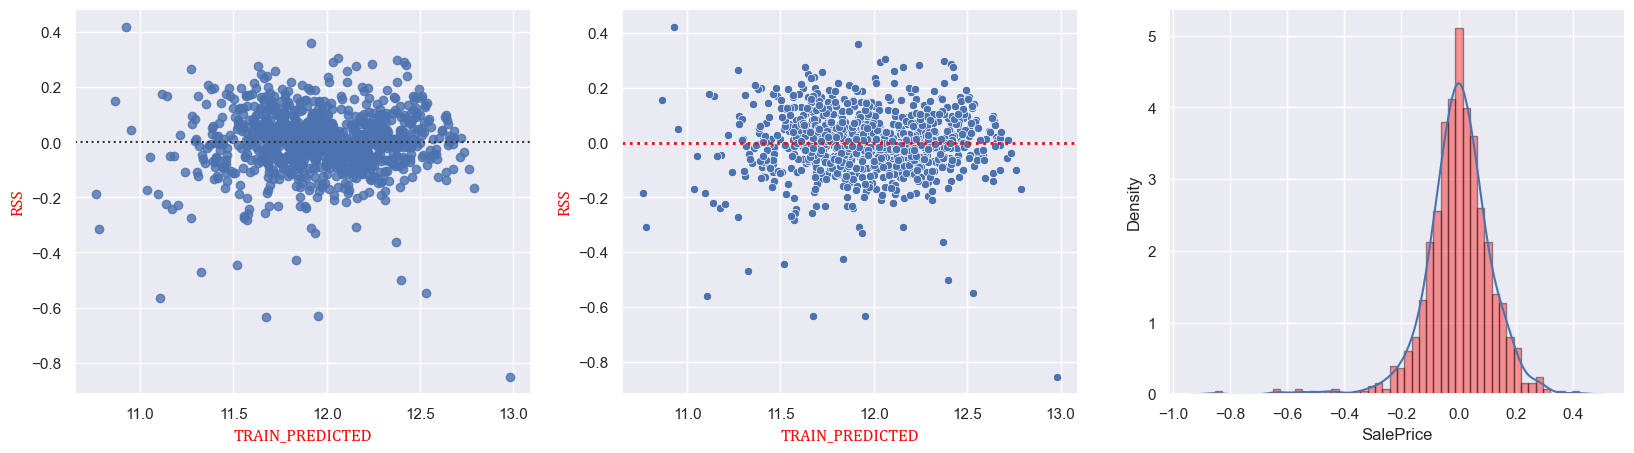

In [105]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.residplot(x=y_train_pred,y=rss,)
plt.xlabel('TRAIN_PREDICTED',fontdict={'family':'cambria','fontsize':12,'color':'red'})
plt.ylabel('RSS',fontdict={'family':'cambria','fontsize':12,'color':'red'})
plt.subplot(1,3,2)
sns.scatterplot(x=y_train_pred,y=rss)
plt.axhline(y=0,linewidth=2,color='red',linestyle=':')
plt.xlabel('TRAIN_PREDICTED',fontdict={'family':'cambria','fontsize':12,'color':'red'})
plt.ylabel('RSS',fontdict={'family':'cambria','fontsize':12,'color':'red'})
plt.subplot(1,3,3)
sns.distplot(rss,hist_kws={'edgecolor':'black','facecolor':'red'}) 

plt.show()

In [106]:
from sklearn.linear_model import Ridge,Lasso
from sklearn.model_selection import GridSearchCV

# `RIDGE REGRESSION`

In [107]:
params={'alpha':[0.0001,0.001,0.01,0.05,
                 0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,
                 1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,
                 20,50,100,500,1000]}



ridge=Ridge()
folds=5
model_cv_ridge=GridSearchCV(estimator=ridge,cv=folds,verbose=1,return_train_score=True,scoring='neg_mean_absolute_error',param_grid=params)
model_cv_ridge.fit(X_train,y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [108]:
print(f'the best params is {model_cv_ridge.best_params_}')
print(f"the best score is {model_cv_ridge.best_score_}")

the best params is {'alpha': 2.0}
the best score is -0.10099065006415645


In [109]:
model_cv_ridge.best_index_

14

In [110]:

model_cv_ridge.cv_results_

{'mean_fit_time': array([0.01009817, 0.00625153, 0.00912046, 0.01204033, 0.00312428,
        0.00624843, 0.00312414, 0.00624824, 0.00624833, 0.00744615,
        0.0064332 , 0.01031132, 0.01341186, 0.00668912, 0.00516505,
        0.00650015, 0.01058278, 0.00579844, 0.00937662, 0.00743642,
        0.00937324, 0.0093842 , 0.00956416, 0.01173372, 0.00019965,
        0.00958958, 0.00311594, 0.00357084]),
 'std_fit_time': array([0.0083335 , 0.00765653, 0.00847427, 0.00369721, 0.00624857,
        0.00765273, 0.00624828, 0.00765249, 0.00765261, 0.00702347,
        0.00508305, 0.00846273, 0.00693606, 0.00599553, 0.00655632,
        0.00797053, 0.00879237, 0.00673647, 0.00765598, 0.00683444,
        0.00765321, 0.0076622 , 0.00740888, 0.00605225, 0.0003993 ,
        0.00741627, 0.00623188, 0.00714169]),
 'mean_score_time': array([0.00660934, 0.00629468, 0.00441566, 0.00159798, 0.00624833,
        0.00624161, 0.00312414, 0.00312443, 0.00312409, 0.00059786,
        0.00178027, 0.        , 0.003675

In [111]:
cv_result_ridge=pd.DataFrame(model_cv_ridge.cv_results_)
cv_result_ridge=cv_result_ridge[cv_result_ridge['param_alpha']<=1]
cv_result_ridge

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.010098,0.008333,0.006609,0.008115,0.0001,{'alpha': 0.0001},-0.111921,-0.095404,-0.106572,-0.105764,-0.112525,-0.106437,0.006153,22,-0.070690,-0.080263,-0.078112,-0.071716,-0.074449,-0.075046,0.003662
1,0.006252,0.007657,0.006295,0.007709,0.001,{'alpha': 0.001},-0.111814,-0.095407,-0.106507,-0.105612,-0.112489,-0.106366,0.006130,21,-0.070705,-0.080268,-0.078107,-0.071715,-0.074461,-0.075051,0.003658
2,0.009120,0.008474,0.004416,0.003983,0.01,{'alpha': 0.01},-0.111252,-0.095390,-0.106026,-0.104631,-0.112186,-0.105897,0.006004,20,-0.070826,-0.080301,-0.078093,-0.071746,-0.074552,-0.075104,0.003628
3,0.012040,0.003697,0.001598,0.003196,0.05,{'alpha': 0.05},-0.110464,-0.095125,-0.105171,-0.103342,-0.111232,-0.105067,0.005813,18,-0.071130,-0.080378,-0.078243,-0.072046,-0.074830,-0.075326,0.003540
4,0.003124,0.006249,0.006248,0.007653,0.1,{'alpha': 0.1},-0.109914,-0.094782,-0.104484,-0.102764,-0.110290,-0.104447,0.005662,16,-0.071449,-0.080469,-0.078426,-0.072253,-0.075107,-0.075541,0.003474
5,0.006248,0.007653,0.006242,0.007644,0.2,{'alpha': 0.2},-0.109063,-0.094118,-0.103481,-0.102147,-0.108951,-0.103552,0.005486,14,-0.072030,-0.080621,-0.078716,-0.072618,-0.075592,-0.075915,0.003349
6,0.003124,0.006248,0.003124,0.006248,0.3,{'alpha': 0.3},-0.108404,-0.093576,-0.102782,-0.101825,-0.107986,-0.102914,0.005372,12,-0.072462,-0.080757,-0.078967,-0.072965,-0.076034,-0.076237,0.003252
7,0.006248,0.007652,0.003124,0.006249,0.4,{'alpha': 0.4},-0.107912,-0.093153,-0.102445,-0.101625,-0.107234,-0.102474,0.005288,10,-0.072822,-0.080897,-0.079173,-0.073334,-0.076470,-0.076539,0.003163
8,0.006248,0.007653,0.003124,0.006248,0.5,{'alpha': 0.5},-0.107510,-0.092725,-0.102218,-0.101509,-0.106608,-0.102114,0.005251,9,-0.073148,-0.081057,-0.079351,-0.073683,-0.076870,-0.076822,0.003088
9,0.007446,0.007023,0.000598,0.001196,0.6,{'alpha': 0.6},-0.107151,-0.092335,-0.102231,-0.101507,-0.106112,-0.101867,0.005236,7,-0.073454,-0.081209,-0.079515,-0.074002,-0.077241,-0.077084,0.003021


In [112]:
cv_result_ridge['param_alpha']=cv_result_ridge['param_alpha'].astype('float32')

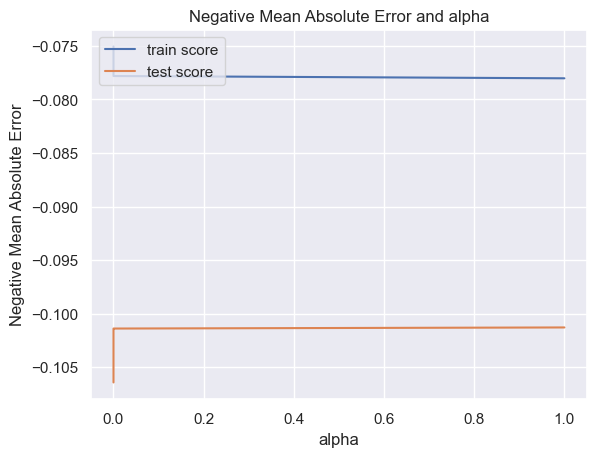

In [113]:
# plotting mean test and train scoes with alpha 
cv_result_ridge['param_alpha'] = cv_result_ridge['param_alpha'].astype('int32')

# plotting
plt.plot(cv_result_ridge['param_alpha'], cv_result_ridge['mean_train_score'])
plt.plot(cv_result_ridge['param_alpha'], cv_result_ridge['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [114]:
alpha=3.0
ridge=Ridge()
ridge.fit(X_train,y_train)

Ridge()

In [115]:
ridge.intercept_

10.991221900959308

In [116]:

ridge.coef_

array([-1.16122855e-01,  1.21417698e-01,  4.63364530e-01, -7.06294085e-02,
       -8.45542561e-02,  2.68455614e-04,  7.61238084e-02,  3.41375827e-01,
        1.42395716e-01,  3.68389795e-01,  1.31478903e-01,  5.52776253e-02,
        1.46421097e-01,  6.28505440e-02,  1.49203703e-01,  1.03604589e-02,
        2.13034904e-02,  2.07353823e-01,  7.78992674e-02,  8.53560271e-02,
        3.38665426e-02,  1.19204167e-01, -2.77577197e-01,  8.90498461e-03,
        2.70057406e-03,  1.39131281e-01,  1.30389672e-01,  1.60304961e-01,
        1.39316723e-01,  1.02935709e-02, -1.04296628e-01,  4.78260607e-03,
        8.43615832e-02,  2.39248332e-02,  6.28401564e-02,  2.58326121e-02,
       -4.86153910e-02, -6.55503885e-02, -2.64956535e-02,  1.67458216e-02,
       -3.11791348e-02,  0.00000000e+00, -6.58087721e-02, -4.74564938e-02,
        9.10815499e-02, -2.61922763e-03,  1.19856249e-01, -1.03469921e-01,
        4.27270834e-03, -1.09321144e-01, -2.17319867e-01, -3.58154728e-02,
       -2.86366244e-02,  

In [117]:
y_train_pred_ridge=ridge.predict(X_train)
y_test_pred_ridge=ridge.predict(X_test)

In [118]:
rss_ridge=y_train-y_train_pred_ridge

In [119]:
model_parametrs_ridge=list(ridge.coef_)
model_parametrs_ridge.insert(0,ridge.intercept_)
model_parametrs_ridge=[round(x,3) for x in model_parametrs_ridge]
cols=X.columns
cols=cols.insert(0,'constant')
list(zip(cols,model_parametrs_ridge))

[('constant', 10.991),
 ('LotFrontage', -0.116),
 ('LotArea', 0.121),
 ('OverallQual', 0.463),
 ('MasVnrArea', -0.071),
 ('BsmtFinSF1', -0.085),
 ('BsmtFinSF2', 0.0),
 ('TotalBsmtSF', 0.076),
 ('1stFlrSF', 0.341),
 ('2ndFlrSF', 0.142),
 ('GrLivArea', 0.368),
 ('BsmtFullBath', 0.131),
 ('BsmtHalfBath', 0.055),
 ('FullBath', 0.146),
 ('HalfBath', 0.063),
 ('BedroomAbvGr', 0.149),
 ('KitchenAbvGr', 0.01),
 ('Fireplaces', 0.021),
 ('GarageArea', 0.207),
 ('WoodDeckSF', 0.078),
 ('OpenPorchSF', 0.085),
 ('EnclosedPorch', 0.034),
 ('ScreenPorch', 0.119),
 ('PoolArea', -0.278),
 ('MiscVal', 0.009),
 ('Property_age_years', 0.003),
 ('MSZoning_FV', 0.139),
 ('MSZoning_RH', 0.13),
 ('MSZoning_RL', 0.16),
 ('MSZoning_RM', 0.139),
 ('LotShape_IR2', 0.01),
 ('LotShape_IR3', -0.104),
 ('LotShape_Reg', 0.005),
 ('LandContour_HLS', 0.084),
 ('LandContour_Low', 0.024),
 ('LandContour_Lvl', 0.063),
 ('LotConfig_CulDSac', 0.026),
 ('LotConfig_FR2', -0.049),
 ('LotConfig_FR3', -0.066),
 ('LotConfig_Inside

## CALCULATING THE R2 SQUARED RMSE MSE FOR ``RIDGE REGRESSION``

In [120]:

metric_ridge=[]



# calculating r^2 vvalue for both train and test case
r2_score_for_train=r2_score(y_train,y_train_pred_ridge)
print(f'R2_SCORE_FOR_TRAIN : {r2_score_for_train} ')
metric_ridge.append(r2_score_for_train)

r2_score_for_test =r2_score(y_test,y_test_pred_ridge)
print(f'R2_SCORE_FOR_TEST IS : {r2_score_for_test}')
metric_ridge.append(r2_score_for_test)

# -------------------------------------------------------------------------------
# rss for train and test case
rss_for_train=np.sum(np.square(y_train-y_train_pred_ridge))
print(f'THE RSS FOR TRAIN IS : {rss_for_train}')
metric_ridge.append(rss_for_train)

rss_for_test=np.sum(np.square(y_test-y_test_pred_ridge))
print(f'THE RSS FOR TEST IS : {rss_for_test}')
metric_ridge.append(rss_for_test)
# -------------------------------------------------------------------------------
# calculating mse for train and test
mse_for_train=mean_squared_error(y_train,y_train_pred_ridge)
print(f'MSE FOR TRAIN IS : {mse_for_train}')
metric_ridge.append(mse_for_train)

mse_for_test=mean_squared_error(y_test,y_test_pred_ridge)
print(f'MSE FOR TEST IS : {mse_for_test}')
metric_ridge.append(mse_for_test)
# --------------------------------------------------------------------------------
# # calculatin the rmse for train and teest cases

rmse_for_train=mse_for_train**0.5
print(F'THE RMSE FOR TRAIN IS : {rmse_for_train}')
metric_ridge.append(rmse_for_train)

rmse_for_test=mse_for_test**0.5
print(F'THE RMSE FOR TEST IS : {rmse_for_test}')
metric_ridge.append(rmse_for_test)


R2_SCORE_FOR_TRAIN : 0.8968074572860429 
R2_SCORE_FOR_TEST IS : 0.8379249657753158
THE RSS FOR TRAIN IS : 12.72370840201823
THE RSS FOR TEST IS : 8.51081489888161
MSE FOR TRAIN IS : 0.01299663779572853
MSE FOR TEST IS : 0.020263844997337167
THE RMSE FOR TRAIN IS : 0.11400279731536647
THE RMSE FOR TEST IS : 0.14235113275747815


In [121]:
# Create a dataframe for Ridge Coefficients
mod_ridge = list(zip(cols, model_parametrs_ridge))

In [122]:
coef_ridge=pd.DataFrame(mod_ridge)
coef_ridge.columns=['variable','coeff']
coef_ridge=coef_ridge.sort_values(by=['coeff'],ascending=False)
coef_ridge.head()

,variable,coeff
0,constant,10.991
3,OverallQual,0.463
10,GrLivArea,0.368
8,1stFlrSF,0.341
18,GarageArea,0.207


In [123]:
coef_ridge.shape

(198, 2)

In [124]:
coef_ridge=pd.DataFrame(coef_ridge[(coef_ridge['coeff']>=0.1)])
coef_ridge

,variable,coeff
0,constant,10.991
3,OverallQual,0.463
10,GrLivArea,0.368
8,1stFlrSF,0.341
18,GarageArea,0.207
28,MSZoning_RL,0.160
15,BedroomAbvGr,0.149
13,FullBath,0.146
9,2ndFlrSF,0.142
26,MSZoning_FV,0.139


In [125]:
len(pd.DataFrame(coef_ridge[(coef_ridge['coeff']>=0.1)]))

20

# `LASSO REGRESSION`

In [126]:
print('X_train',X_train.shape)
print('y_train',y_train.shape)

X_train (979, 197)
y_train (979,)


In [127]:
params={'alpha':[0.0001,0.001,0.01,0.05,
                 0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,
                 1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,
                 20,50,100,500,1000]}

lasso= Lasso()
folds=5
model_cv_laso=GridSearchCV(estimator=lasso,
                     param_grid=params,
                     scoring='neg_mean_absolute_error',
                    cv=folds,verbose=1,return_train_score=True)
model_cv_laso.fit(X_train,y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [128]:
print(f'the best params is {model_cv_laso.best_params_}')
print(f"the best score is {model_cv_laso.best_score_}")

the best params is {'alpha': 0.0001}
the best score is -0.10066474764473729


In [129]:
model_cv_laso.best_index_

0

In [130]:
model_cv_laso.cv_results_

{'mean_fit_time': array([0.0588666 , 0.02124872, 0.01327114, 0.0175015 , 0.00966368,
        0.01286826, 0.01149697, 0.01196947, 0.01335077, 0.01350861,
        0.0072021 , 0.00535827, 0.01176858, 0.01015587, 0.01298137,
        0.00860395, 0.0093729 , 0.00636973, 0.00938616, 0.00837178,
        0.01093016, 0.01689963, 0.00824704, 0.01800399, 0.01435575,
        0.0068397 , 0.01611118, 0.01195879]),
 'std_fit_time': array([0.01143858, 0.00559805, 0.00391552, 0.00634462, 0.00113754,
        0.00396724, 0.00421413, 0.00333433, 0.00364918, 0.00735828,
        0.00561503, 0.00757032, 0.00646239, 0.00841233, 0.00370068,
        0.00503714, 0.00765294, 0.00591842, 0.00766379, 0.00707593,
        0.00601017, 0.00106412, 0.00704033, 0.00468212, 0.00762111,
        0.00767712, 0.00098024, 0.00607076]),
 'mean_score_time': array([0.00522914, 0.00569787, 0.00478024, 0.0049233 , 0.        ,
        0.00044627, 0.00501056, 0.00713863, 0.00691805, 0.00675316,
        0.00128713, 0.00325294, 0.      

In [131]:
cv_result_lasso=pd.DataFrame(model_cv_laso.cv_results_)
cv_result_lasso=cv_result_lasso[cv_result_lasso['param_alpha']<=1]
cv_result_lasso

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.058867,0.011439,0.005229,0.003889,0.0001,{'alpha': 0.0001},-0.105846,-0.091165,-0.100526,-0.099720,-0.106067,-0.100665,0.005426,1,-0.073416,-0.081269,-0.079445,-0.073971,-0.076686,-0.076957,0.003043
1,0.021249,0.005598,0.005698,0.003246,0.001,{'alpha': 0.001},-0.102585,-0.097002,-0.107788,-0.102165,-0.102025,-0.102313,0.003416,2,-0.086634,-0.093056,-0.091701,-0.087203,-0.090405,-0.089800,0.002504
2,0.013271,0.003916,0.004780,0.003904,0.01,{'alpha': 0.01},-0.136812,-0.150855,-0.151167,-0.152474,-0.147354,-0.147733,0.005717,3,-0.141310,-0.141668,-0.140654,-0.143371,-0.141355,-0.141671,0.000911
3,0.017501,0.006345,0.004923,0.003911,0.05,{'alpha': 0.05},-0.189849,-0.225669,-0.224972,-0.211836,-0.203398,-0.211145,0.013536,4,-0.210311,-0.208490,-0.207804,-0.208399,-0.206122,-0.208225,0.001346
4,0.009664,0.001138,0.000000,0.000000,0.1,{'alpha': 0.1},-0.255747,-0.295065,-0.298285,-0.275441,-0.266516,-0.278211,0.016347,5,-0.283756,-0.273875,-0.273094,-0.278799,-0.281098,-0.278124,0.004108
5,0.012868,0.003967,0.000446,0.000549,0.2,{'alpha': 0.2},-0.255747,-0.295065,-0.298285,-0.275441,-0.266516,-0.278211,0.016347,5,-0.283756,-0.273875,-0.273094,-0.278799,-0.281098,-0.278124,0.004108
6,0.011497,0.004214,0.005011,0.003684,0.3,{'alpha': 0.3},-0.255747,-0.295065,-0.298285,-0.275441,-0.266516,-0.278211,0.016347,5,-0.283756,-0.273875,-0.273094,-0.278799,-0.281098,-0.278124,0.004108
7,0.011969,0.003334,0.007139,0.003675,0.4,{'alpha': 0.4},-0.255747,-0.295065,-0.298285,-0.275441,-0.266516,-0.278211,0.016347,5,-0.283756,-0.273875,-0.273094,-0.278799,-0.281098,-0.278124,0.004108
8,0.013351,0.003649,0.006918,0.003508,0.5,{'alpha': 0.5},-0.255747,-0.295065,-0.298285,-0.275441,-0.266516,-0.278211,0.016347,5,-0.283756,-0.273875,-0.273094,-0.278799,-0.281098,-0.278124,0.004108
9,0.013509,0.007358,0.006753,0.002635,0.6,{'alpha': 0.6},-0.255747,-0.295065,-0.298285,-0.275441,-0.266516,-0.278211,0.016347,5,-0.283756,-0.273875,-0.273094,-0.278799,-0.281098,-0.278124,0.004108


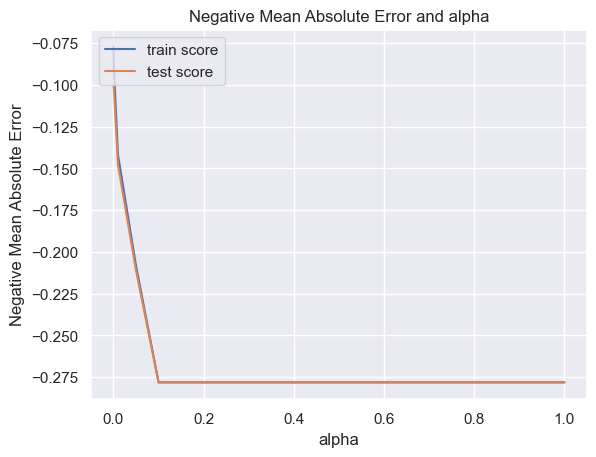

In [132]:
cv_result_lasso['param_alpha']=cv_result_lasso['param_alpha'].astype('float32')


plt.plot(cv_result_lasso['param_alpha'],cv_result_lasso['mean_train_score'])

plt.plot(cv_result_lasso['param_alpha'],cv_result_lasso['mean_test_score'])


plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()
plt.show()


In [133]:
alpha=0.0001
lasso=Lasso(alpha=alpha)
lasso.fit(X_train,y_train)

Lasso(alpha=0.0001)

In [134]:
lasso.intercept_

10.81594331957829

In [135]:
lasso.coef_

array([-1.23818013e-01,  1.11072004e-01,  5.20420301e-01, -8.38616583e-02,
       -7.79860779e-02,  0.00000000e+00,  0.00000000e+00,  4.18419078e-02,
       -0.00000000e+00,  9.72351931e-01,  1.38174825e-01,  6.43866887e-02,
        1.27810787e-01,  5.09997281e-02,  1.01802827e-01, -0.00000000e+00,
        0.00000000e+00,  2.11210425e-01,  7.08964192e-02,  6.87566267e-02,
        3.01033453e-02,  1.34887337e-01, -4.05045894e-01,  0.00000000e+00,
       -5.68554681e-03,  1.84675593e-01,  1.79318078e-01,  2.01606669e-01,
        1.74329895e-01,  1.83402042e-03, -8.45408231e-02,  2.30557902e-03,
        8.46679207e-02,  2.12555169e-02,  6.32173358e-02,  2.25145508e-02,
       -3.71962291e-02, -4.34747229e-02, -2.41018579e-02,  1.50102296e-02,
       -1.44445707e-02,  0.00000000e+00, -3.55397906e-02, -2.36712271e-02,
        1.19263755e-01,  1.20717291e-02,  1.29814942e-01, -8.44595087e-02,
        2.15703384e-02, -7.83322049e-02, -1.91984205e-01, -1.26375253e-02,
       -1.10356093e-02,  

In [136]:
model_parametrs_lasso=list(lasso.coef_)
model_parametrs_lasso.insert(0,lasso.intercept_)
model_parametrs_lasso=[round(x,3) for x in model_parametrs_lasso]
cols=X.columns
cols=cols.insert(0,'constant')


In [137]:
mod_lasso=list(zip(cols,model_parametrs_lasso))

In [138]:
mod_lasso

[('constant', 10.816),
 ('LotFrontage', -0.124),
 ('LotArea', 0.111),
 ('OverallQual', 0.52),
 ('MasVnrArea', -0.084),
 ('BsmtFinSF1', -0.078),
 ('BsmtFinSF2', 0.0),
 ('TotalBsmtSF', 0.0),
 ('1stFlrSF', 0.042),
 ('2ndFlrSF', -0.0),
 ('GrLivArea', 0.972),
 ('BsmtFullBath', 0.138),
 ('BsmtHalfBath', 0.064),
 ('FullBath', 0.128),
 ('HalfBath', 0.051),
 ('BedroomAbvGr', 0.102),
 ('KitchenAbvGr', -0.0),
 ('Fireplaces', 0.0),
 ('GarageArea', 0.211),
 ('WoodDeckSF', 0.071),
 ('OpenPorchSF', 0.069),
 ('EnclosedPorch', 0.03),
 ('ScreenPorch', 0.135),
 ('PoolArea', -0.405),
 ('MiscVal', 0.0),
 ('Property_age_years', -0.006),
 ('MSZoning_FV', 0.185),
 ('MSZoning_RH', 0.179),
 ('MSZoning_RL', 0.202),
 ('MSZoning_RM', 0.174),
 ('LotShape_IR2', 0.002),
 ('LotShape_IR3', -0.085),
 ('LotShape_Reg', 0.002),
 ('LandContour_HLS', 0.085),
 ('LandContour_Low', 0.021),
 ('LandContour_Lvl', 0.063),
 ('LotConfig_CulDSac', 0.023),
 ('LotConfig_FR2', -0.037),
 ('LotConfig_FR3', -0.043),
 ('LotConfig_Inside', -0

In [139]:
coef_lasso=pd.DataFrame(mod_lasso)
coef_lasso.columns=['variables','coeff']
coef_lasso=coef_lasso.sort_values(['coeff'],ascending=False)

In [140]:
len(coef_lasso[(coef_lasso['coeff']>=0.1)])

21

In [141]:
coef_lasso=coef_lasso[(coef_lasso['coeff']>=0.1)]

In [142]:
coef_lasso

,variables,coeff
0,constant,10.816
10,GrLivArea,0.972
3,OverallQual,0.520
18,GarageArea,0.211
28,MSZoning_RL,0.202
26,MSZoning_FV,0.185
27,MSZoning_RH,0.179
29,MSZoning_RM,0.174
57,Neighborhood_NridgHt,0.142
11,BsmtFullBath,0.138


In [143]:
coef_lasso.shape

(21, 2)

In [144]:
y_train_pred_lasso=lasso.predict(X_train)
y_test_pred_lasso=lasso.predict(X_test)

In [145]:
y_train_pred_lasso

array([12.34002616, 12.04937127, 12.02532179, 12.16060106, 11.44970834,
       11.67801593, 12.3647295 , 12.43133429, 11.68274917, 11.71449859,
       12.31795271, 11.64727889, 11.69670978, 12.19177693, 12.1435597 ,
       11.87431023, 11.48956884, 11.81038398, 12.07178631, 11.82530415,
       11.8806998 , 11.7124424 , 11.9658233 , 12.49235478, 11.51646573,
       12.22060076, 11.85007762, 11.23791091, 11.28064301, 11.63909119,
       12.66953504, 12.04922004, 11.94932173, 12.62493396, 12.20102413,
       11.84798166, 12.27121497, 11.87948691, 12.05032439, 11.38573018,
       11.86084349, 12.00124903, 12.54811514, 12.192412  , 11.88824441,
       11.99909322, 12.04816478, 12.12535405, 11.75171869, 12.56431773,
       11.54117041, 12.378426  , 11.7977402 , 12.3172644 , 12.08952973,
       12.03196431, 12.13854895, 11.77636375, 11.95858834, 11.81037341,
       12.36541079, 12.08108708, 11.67967712, 11.82609007, 11.57957884,
       12.44393023, 12.07265008, 11.75181126, 11.99685436, 12.02

In [146]:
rss_lasso=y_train-y_train_pred_lasso

### CALCULATING THE R2 SCORE RMSE MSE FOR ```LASSO REGRESSION```

In [147]:

metric_lasso=[]



# calculating r^2 vvalue for both train and test case
r2_score_for_train=r2_score(y_train,y_train_pred_lasso)
print(f'R2_SCORE_FOR_TRAIN : {r2_score_for_train} ')
metric_lasso.append(r2_score_for_train)

r2_score_for_test =r2_score(y_test,y_test_pred_lasso)
print(f'R2_SCORE_FOR_TEST IS : {r2_score_for_test}')
metric_lasso.append(r2_score_for_test)

# -------------------------------------------------------------------------------
# rss for train and test case
rss_for_train=np.sum(np.square(y_train-y_train_pred_lasso))
print(f'THE RSS FOR TRAIN IS : {rss_for_train}')
metric_lasso.append(rss_for_train)

rss_for_test=np.sum(np.square(y_test-y_test_pred_lasso))
print(f'THE RSS FOR TEST IS : {rss_for_test}')
metric_lasso.append(rss_for_test)
# -------------------------------------------------------------------------------
# calculating mse for train and test
mse_for_train=mean_squared_error(y_train,y_train_pred_lasso)
print(f'MSE FOR TRAIN IS : {mse_for_train}')
metric_lasso.append(mse_for_train)

mse_for_test=mean_squared_error(y_test,y_test_pred_lasso)
print(f'MSE FOR TEST IS : {mse_for_test}')
metric_lasso.append(mse_for_test)
# --------------------------------------------------------------------------------
# # calculatin the rmse for train and teest cases

rmse_for_train=mse_for_train**0.5
print(F'THE RMSE FOR TRAIN IS : {rmse_for_train}')
metric_lasso.append(rmse_for_train)

rmse_for_test=mse_for_test**0.5
print(F'THE RMSE FOR TEST IS : {rmse_for_test}')
metric_lasso.append(rmse_for_test)


R2_SCORE_FOR_TRAIN : 0.8971683001148794 
R2_SCORE_FOR_TEST IS : 0.8008931994297012
THE RSS FOR TRAIN IS : 12.67921624384164
THE RSS FOR TEST IS : 10.45541117957244
MSE FOR TRAIN IS : 0.012951191260308111
MSE FOR TEST IS : 0.024893836141839144
THE RMSE FOR TRAIN IS : 0.1138033007443462
THE RMSE FOR TEST IS : 0.15777780623978502


In [148]:
# CREATING A TABLE WHICH CONTAINS ALL THE METRICS
lr_tabel={'METRICS':['R2 Score (Train)','R2 Score (Test)','RSS(Train)',
                    'RSS(Test)','MSE(Train)','MSE(Test)','RMSE(Train)','RMSE(Test)'],
          'LINEAR_REGREESION':metric_linear,'RIDGE_REGRESSION':metric_ridge,'LASSO_REGRESSION':metric_lasso}

In [149]:
final_metric=pd.DataFrame(lr_tabel,columns=['METRICS','LINEAR_REGREESION','RIDGE_REGRESSION','LASSO_REGRESSION'])
final_metric

,METRICS,LINEAR_REGREESION,RIDGE_REGRESSION,LASSO_REGRESSION
0,R2 Score (Train),8.953741e-01,0.896807,0.897168
1,R2 Score (Test),-2.378887e+22,0.837925,0.800893
2,RSS(Train),1.290044e+01,12.723708,12.679216
3,RSS(Test),1.249191e+24,8.510815,10.455411
4,MSE(Train),1.317717e-02,0.012997,0.012951
5,MSE(Test),2.974264e+21,0.020264,0.024894
6,RMSE(Train),1.147918e-01,0.114003,0.113803
7,RMSE(Test),5.453682e+10,0.142351,0.157778


## LETS OBSERVE THE CHANGES IN THE COEFFICIENTS AFTER THE REGULARISATION

In [150]:
beta=pd.DataFrame(index=X.columns)

In [151]:
beta['linear']=lm.coef_
beta['ridge']=ridge.coef_
beta['lasso']=lasso.coef_

In [152]:
beta

,linear,ridge,lasso
LotFrontage,-1.959600e-01,-0.116123,-0.123818
LotArea,2.774817e-01,0.121418,0.111072
OverallQual,5.030293e-01,0.463365,0.520420
MasVnrArea,-8.180627e-02,-0.070629,-0.083862
BsmtFinSF1,-1.496932e-01,-0.084554,-0.077986
BsmtFinSF2,2.055015e-02,0.000268,0.000000
TotalBsmtSF,-8.107038e-03,0.076124,0.000000
1stFlrSF,-1.018710e+00,0.341376,0.041842
2ndFlrSF,-4.117636e-01,0.142396,-0.000000
GrLivArea,2.335524e+00,0.368390,0.972352


In [153]:
final_metric

,METRICS,LINEAR_REGREESION,RIDGE_REGRESSION,LASSO_REGRESSION
0,R2 Score (Train),8.953741e-01,0.896807,0.897168
1,R2 Score (Test),-2.378887e+22,0.837925,0.800893
2,RSS(Train),1.290044e+01,12.723708,12.679216
3,RSS(Test),1.249191e+24,8.510815,10.455411
4,MSE(Train),1.317717e-02,0.012997,0.012951
5,MSE(Test),2.974264e+21,0.020264,0.024894
6,RMSE(Train),1.147918e-01,0.114003,0.113803
7,RMSE(Test),5.453682e+10,0.142351,0.157778


In [154]:
coef_lasso.shape

(21, 2)

In [155]:
coef_ridge.shape

(20, 2)

#  FINALLY IF WE SEE TABLE OF ALL SCORE OF TRAIN AND TEST CASE WE OBSERVE THAT
 - **FOR LINEAR REGRESSION THE TRAIN SCORE WAS GOOD BUT THE TEST SCORE WAS VERY LOW THEN WE HAVE USED LASSO AND RIDGE REGRESSION**
 - **WHEN WE USED THE RIDGE REGRESSION THE  R2 SQUARE TRAIN TEST WAS SLIGHT INCRESED AND TEST R2 SQUARE WAS INCREASD A LOT**
 - **WHEN WE USED THE LASSO REGRESSION THE R2 SQUARE WAS INCRESED SLIGHLTY AND R2 SQUARE WAS DECRESED**
     - **WHEN WE USED RIDGE REGRESSION THERE WAS 193 ROWS**
     - **AFTER PERFORMING THE LASSO THERE WAS 155 ROWS WHICH MEANS THAT IT HAS REMOVED SOME UNWANTED FEATURES WHICH ARE INSIGNIFICANTLY**

## BETTER TO USE LASSO REGRESSION IF IT HAS WORKED WELL

In [156]:
coef_lasso.shape

(21, 2)

In [157]:

coef_lasso.set_index(pd.Index(['C','x1', 'x2', 'x3', 'x4', 'x5' , 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x13', 'x14', 'x15', 'x16','x17','x18','x19','x20']), inplace = True) 


In [158]:
coef_lasso

,variables,coeff
C,constant,10.816
x1,GrLivArea,0.972
x2,OverallQual,0.520
x3,GarageArea,0.211
x4,MSZoning_RL,0.202
x5,MSZoning_FV,0.185
x6,MSZoning_RH,0.179
x7,MSZoning_RM,0.174
x8,Neighborhood_NridgHt,0.142
x9,BsmtFullBath,0.138


In [159]:
final_metric

,METRICS,LINEAR_REGREESION,RIDGE_REGRESSION,LASSO_REGRESSION
0,R2 Score (Train),8.953741e-01,0.896807,0.897168
1,R2 Score (Test),-2.378887e+22,0.837925,0.800893
2,RSS(Train),1.290044e+01,12.723708,12.679216
3,RSS(Test),1.249191e+24,8.510815,10.455411
4,MSE(Train),1.317717e-02,0.012997,0.012951
5,MSE(Test),2.974264e+21,0.020264,0.024894
6,RMSE(Train),1.147918e-01,0.114003,0.113803
7,RMSE(Test),5.453682e+10,0.142351,0.157778


### THE FINAL EQUATION IS WHICH IS USED TO PREDICT THE FINAL HOUSE PRICE

##    Log(Y) = C + 0.972(x1) + 0.520(x2) +  0.211(x3) + 0.202(x4) + 0.185(x5) + 0.179x6) + 0.174(x7) + 0.142 (x8) + 0.138(x9) + 0.135(x10)+ 0.130(x11) + 0.128 (x12) + 0.119(x13) + 0.117(x14)  + 0.115(x15)  + 0.114(x16)  +0.111 (x17)  + 0.104(x18)  +0.103(x19)  +0.102(x20)  + Error term(RSS + alpha * (sum of absolute value of coefficients)